In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings
from sklearn.impute import SimpleImputer

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')
   

In [3]:
df = pd.read_csv('emi_prediction_dataset.csv')
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [4]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [5]:
df.describe()

,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,current_emi_amount,credit_score,emergency_fund,requested_amount,requested_tenure,max_monthly_emi
count,404800.000000,402374.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,402380.000000,402449.000000,4.048000e+05,404800.000000,404800.000000
mean,5.364079,5828.446490,2.940425,1.940425,4624.575593,4066.253706,5687.497777,12804.999506,7119.309783,4543.407609,700.856223,96769.051731,3.708554e+05,29.126677,6763.602156
std,6.079135,8648.604639,1.075199,1.075199,5061.074401,7319.344289,3392.671132,6993.853745,4510.447300,7034.901139,88.435548,81373.053976,3.451945e+05,18.100854,7741.263317
min,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,600.000000,1800.000000,600.000000,0.000000,0.000000,1400.000000,1.000000e+04,3.000000,500.000000
25%,1.200000,0.000000,2.000000,1.000000,0.000000,0.000000,3200.000000,7700.000000,3800.000000,0.000000,654.000000,38400.000000,1.240000e+05,15.000000,500.000000
50%,3.200000,0.000000,3.000000,2.000000,3000.000000,0.000000,4900.000000,11400.000000,6000.000000,0.000000,701.000000,74000.000000,2.360000e+05,25.000000,4211.200000
75%,7.200000,10600.000000,4.000000,3.000000,9000.000000,6500.000000,7400.000000,16400.000000,9300.000000,8000.000000,748.000000,130600.000000,4.940000e+05,40.000000,9792.000000
max,36.000000,80000.000000,5.000000,4.000000,15000.000000,25000.000000,30300.000000,71200.000000,42900.000000,56300.000000,1200.000000,891500.000000,1.500000e+06,84.000000,91040.400000


In [6]:
# Helper function to clean numeric values that might be strings
def clean_numeric_value(value):
    """
    Cleans strings like '15K', '1,50,000', or '... INR'
    and converts them to a float.
    """
    if isinstance(value, (int, float)):
        return float(value)
    
    if not isinstance(value, str):
        return np.nan

    value = value.lower().strip()
    # Remove commas, whitespace, 'inr'
    value = re.sub(r'[\s,inr]', '', value)  
    
    if 'k' in value:
        value = re.sub(r'k', '', value)
        try:
            return float(value) * 1000
        except ValueError:
            return np.nan
    else:
        try:
            return float(value)
        except ValueError:
            return np.nan






### Data Preprocessing

In [7]:
# --- Step 1: Data Preprocessing  ---

print("--- Starting Step 1: Data Preprocessing ---")

# --- 1. Load Data ---
print("Loading data from 'emi_prediction_dataset.csv'...")
try:
    # Use low_memory=False to help with DtypeWarning
    df = pd.read_csv('emi_prediction_dataset.csv', low_memory=False)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("FATAL ERROR: 'emi_prediction_dataset.csv' not found.")
    print("Please make sure the file is in the same directory as your notebook.")
    # This will stop the script if the file isn't found
    raise
except Exception as e:
    print(f"An error occurred loading the data: {e}")
    raise

# --- 2. Clean Problematic Object Columns (Run this FIRST) ---
# This is the key fix. We clean these columns *before* imputation.
# 'errors=coerce' will turn any bad text (like 'Unknown') into NaN.
# We will then *catch* these new NaNs in the next imputation step.
print("Cleaning object columns to numeric (age, monthly_salary, bank_balance)...")
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['monthly_salary'] = pd.to_numeric(df['monthly_salary'], errors='coerce')
df['bank_balance'] = pd.to_numeric(df['bank_balance'], errors='coerce')
print("Object columns coerced to numeric.")


# --- 3. Impute Missing Values (The Corrected Logic) ---
print("\nStarting imputation for all missing values (old and new)...")

# a) Identify ALL columns that now have NaNs
missing_vals = df.isnull().sum()
cols_with_na = missing_vals[missing_vals > 0].index.tolist()

if not cols_with_na:
    print("No missing values found. Skipping imputation.")
else:
    # b) Separate them into numeric and categorical lists *after* cleaning
    numeric_cols_with_na = [col for col in cols_with_na if df[col].dtype in ['float64', 'int64']]
    categorical_cols_with_na = [col for col in cols_with_na if df[col].dtype == 'object']
    
    print(f"Numeric columns to impute: {numeric_cols_with_na}")
    print(f"Categorical columns to impute: {categorical_cols_with_na}")

    # c) Apply Imputation
    # Impute numerical columns with median
    if numeric_cols_with_na:
        num_imputer = SimpleImputer(strategy='median')
        df[numeric_cols_with_na] = num_imputer.fit_transform(df[numeric_cols_with_na])
        print(f"Imputed {len(numeric_cols_with_na)} numeric columns with median.")
    
    # Impute categorical columns with mode (most_frequent)
    if categorical_cols_with_na:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[categorical_cols_with_na] = cat_imputer.fit_transform(df[categorical_cols_with_na])
        print(f"Imputed {len(categorical_cols_with_na)} categorical columns with mode.")

# --- 4. Final Check ---
print("\nFinal check for missing values...")
missing_after_impute = df.isnull().sum().sum()
if missing_after_impute == 0:
    print("Success! All missing values have been handled.")
else:
    # This should not happen, but it's a good safeguard
    print(f"WARNING: There are still {missing_after_impute} missing values. Review your columns.")
    print(df.isnull().sum()[df.isnull().sum() > 0])

print("\n--- Data Preprocessing Complete ---")
print("DataFrame is now clean. You can now re-run Step 3 (Feature Engineering).")

# Optional: Display info and head to confirm
print("\ndf.info() after cleaning:")
df.info()

print("\ndf.head() after cleaning:")
print(df.head())


--- Starting Step 1: Data Preprocessing ---
Loading data from 'emi_prediction_dataset.csv'...
Data loaded successfully.
Cleaning object columns to numeric (age, monthly_salary, bank_balance)...
Object columns coerced to numeric.

Starting imputation for all missing values (old and new)...
Numeric columns to impute: ['age', 'monthly_salary', 'monthly_rent', 'credit_score', 'bank_balance', 'emergency_fund']
Categorical columns to impute: ['education']
Imputed 6 numeric columns with median.
Imputed 1 categorical columns with mode.

Final check for missing values...
Success! All missing values have been handled.

--- Data Preprocessing Complete ---
DataFrame is now clean. You can now re-run Step 3 (Feature Engineering).

df.info() after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                    

In [8]:
df['gender'].unique()

array(['Female', 'Male', 'female', 'male', 'M', 'MALE', 'F', 'FEMALE'],
      dtype=object)

In [9]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


### EDA

In [10]:
# Set a pleasant style for the plots
sns.set_style("whitegrid")
sns.set_context("talk") # 'talk' is a good size for notebooks

--- 1. Target Variable Analysis ---


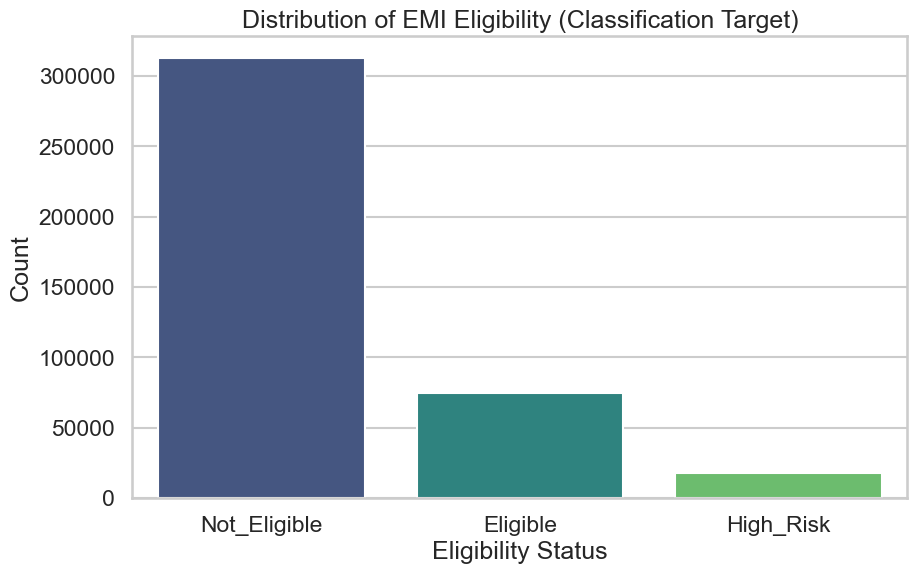

EMI Eligibility Value Counts:
emi_eligibility
Not_Eligible    77.289526
Eligible        18.390316
High_Risk        4.320158
Name: proportion, dtype: float64




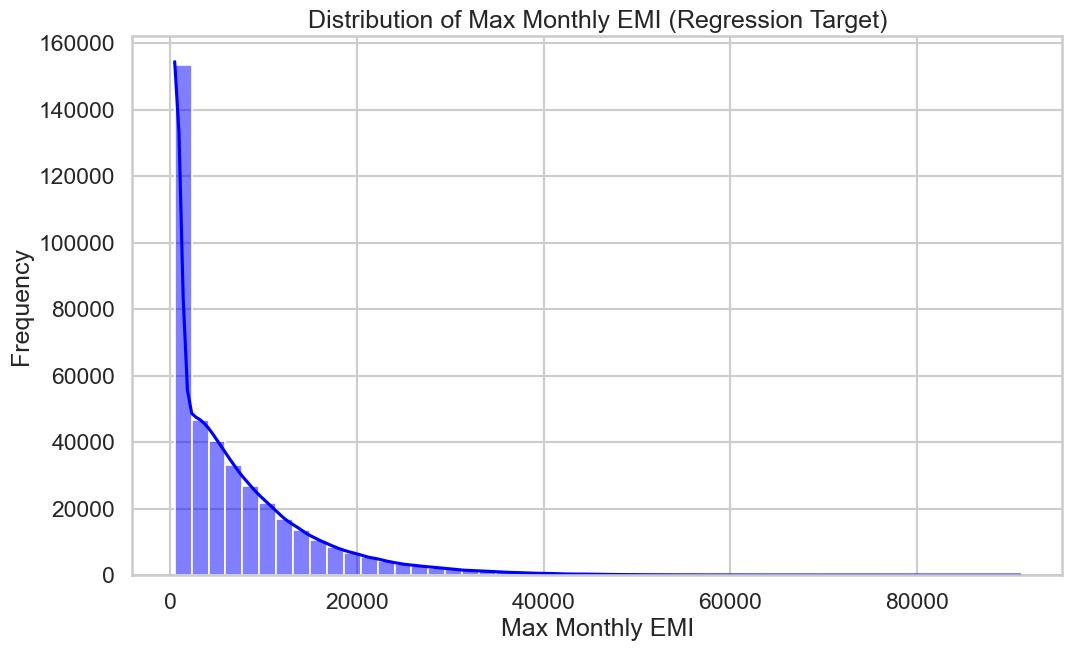

Max Monthly EMI Descriptive Statistics:
count    404800.000000
mean       6763.602156
std        7741.263317
min         500.000000
25%         500.000000
50%        4211.200000
75%        9792.000000
max       91040.400000
Name: max_monthly_emi, dtype: float64


In [11]:
print("--- 1. Target Variable Analysis ---")

# --- a) Classification Target: emi_eligibility ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emi_eligibility', order=df['emi_eligibility'].value_counts().index, palette='viridis')
plt.title('Distribution of EMI Eligibility (Classification Target)')
plt.xlabel('Eligibility Status')
plt.ylabel('Count')
plt.show()

print("EMI Eligibility Value Counts:")
print(df['emi_eligibility'].value_counts(normalize=True) * 100)
print("\n")


# --- b) Regression Target: max_monthly_emi ---
plt.figure(figsize=(12, 7))
sns.histplot(df['max_monthly_emi'], kde=True, bins=50, color='blue')
plt.title('Distribution of Max Monthly EMI (Regression Target)')
plt.xlabel('Max Monthly EMI')
plt.ylabel('Frequency')
plt.show()

print("Max Monthly EMI Descriptive Statistics:")
print(df['max_monthly_emi'].describe())

--- 2. Univariate Analysis (Categorical Features) ---


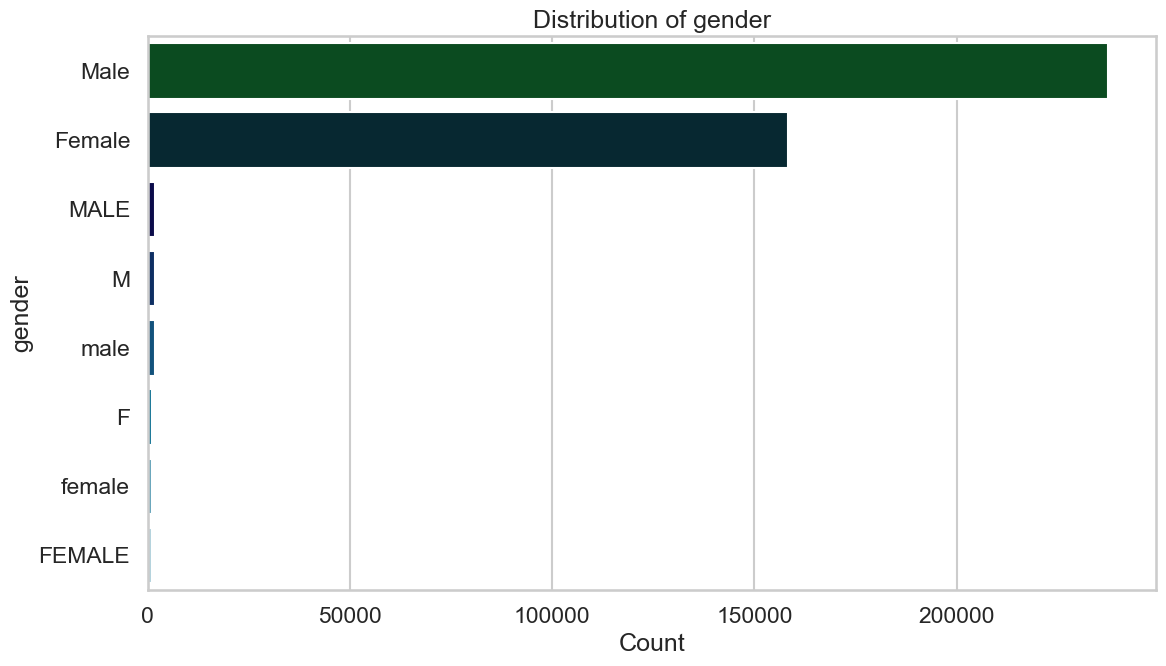

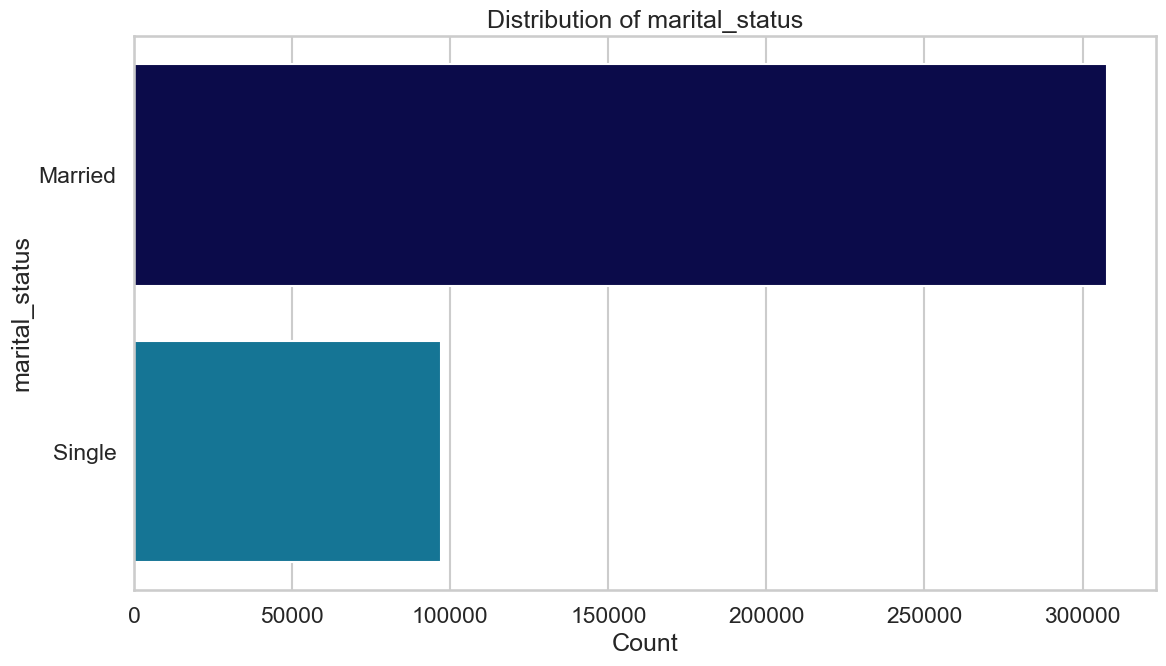

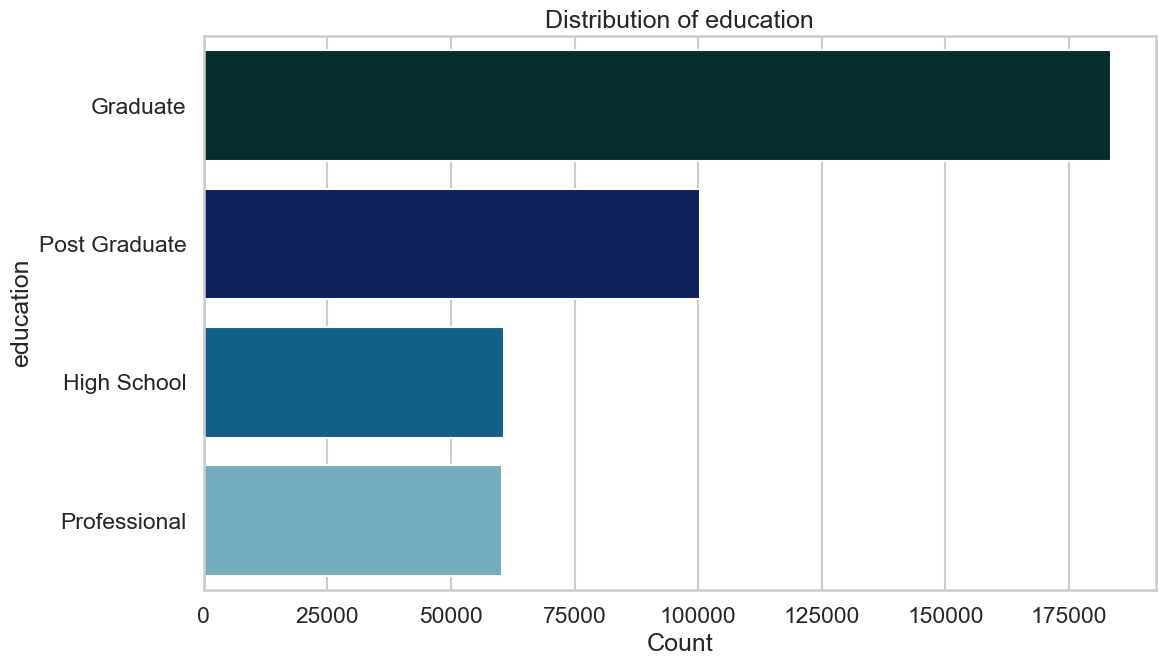

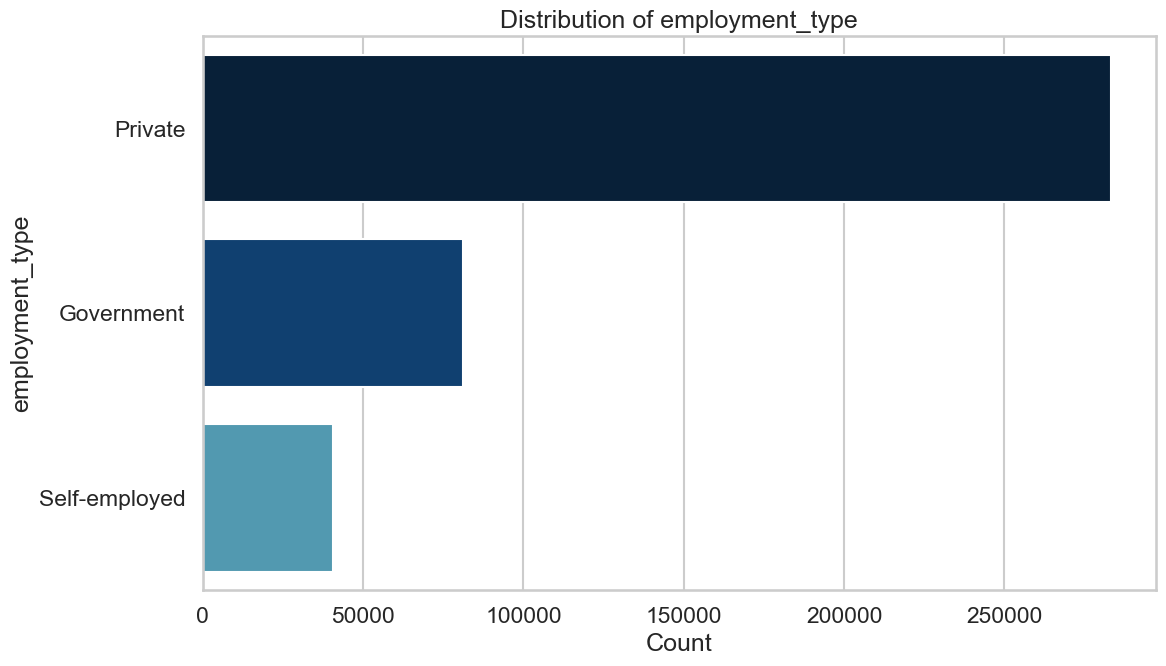

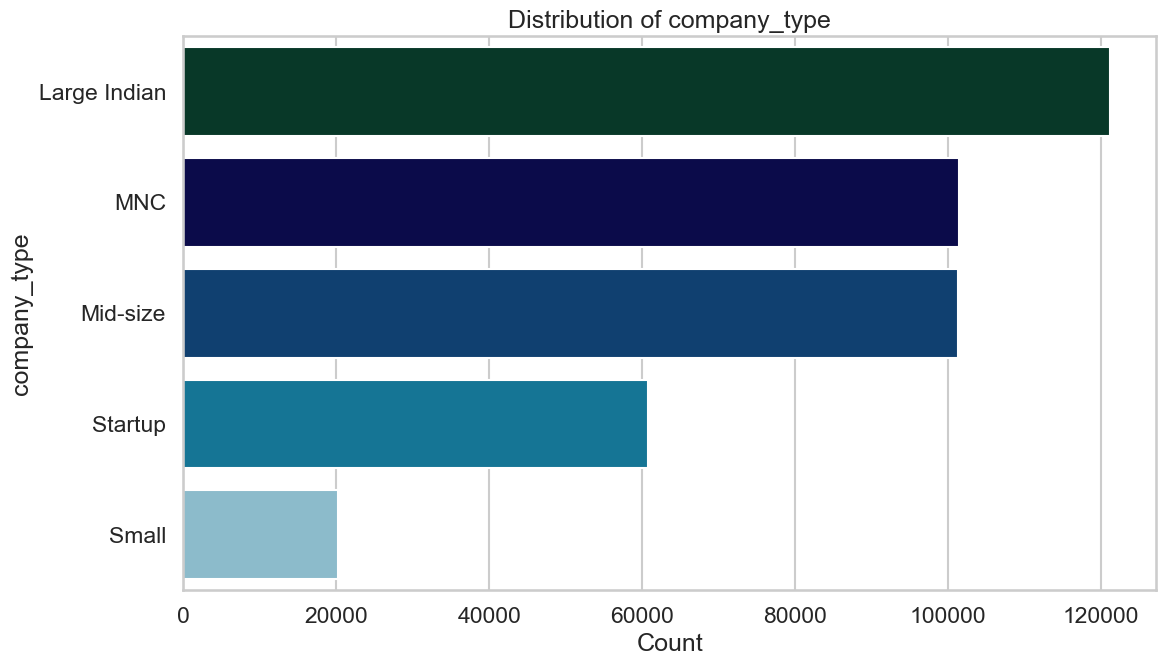

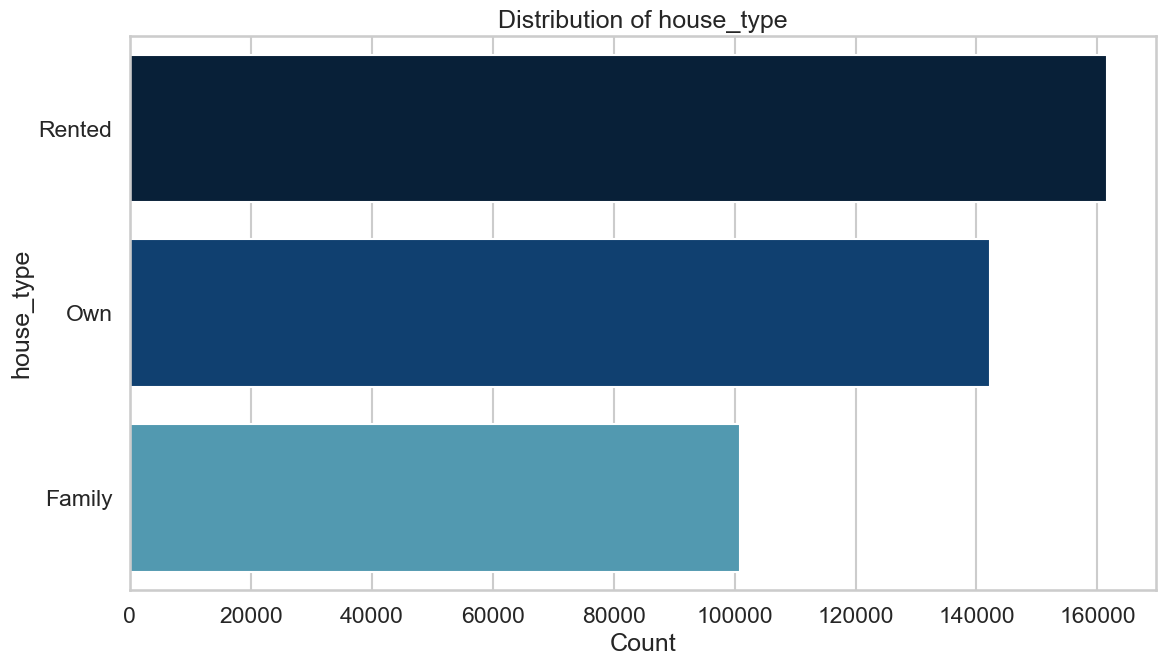

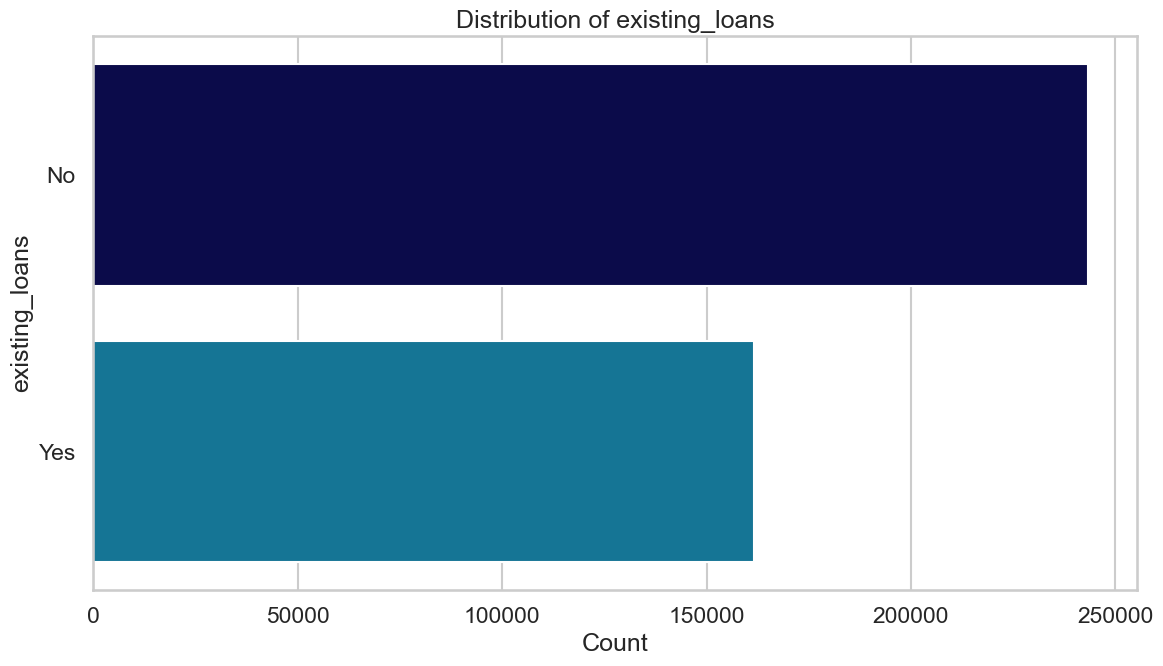

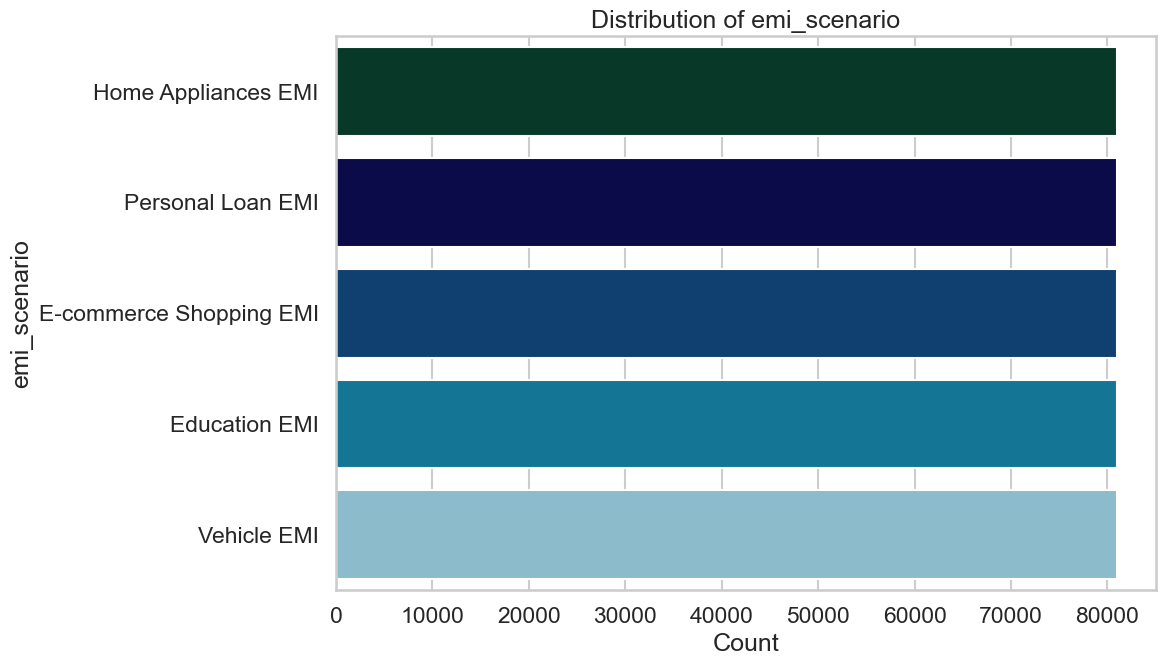

In [12]:
print("--- 2. Univariate Analysis (Categorical Features) ---")

# List of key categorical columns to check
categorical_features = ['gender', 'marital_status', 'education', 
                        'employment_type', 'company_type', 'house_type', 
                        'existing_loans', 'emi_scenario']

# Create plots for each
for col in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='ocean')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


--- 3. Univariate Analysis (Numerical Features) ---
Descriptive Statistics for Numerical Features:
                 age  monthly_salary  years_of_employment   monthly_rent  \
count  404800.000000   404800.000000        404800.000000  404800.000000   
mean       38.875825    59470.891843             5.364079    5793.516126   
std         9.303538    43284.807915             6.079135    8634.376551   
min        26.000000     3967.000000             0.500000       0.000000   
25%        32.000000    35400.000000             1.200000       0.000000   
50%        38.000000    51700.000000             3.200000       0.000000   
75%        48.000000    72800.000000             7.200000   10600.000000   
max        59.000000   499970.000000            36.000000   80000.000000   

         family_size     dependents   credit_score  bank_balance  \
count  404800.000000  404800.000000  404800.000000  4.048000e+05   
mean        2.940425       1.940425     700.857083  2.411676e+05   
std         

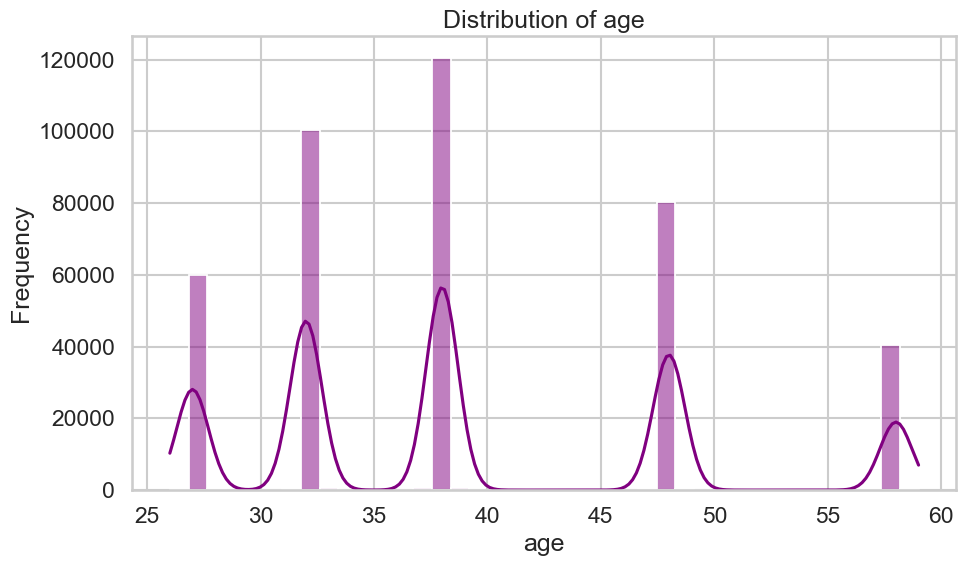

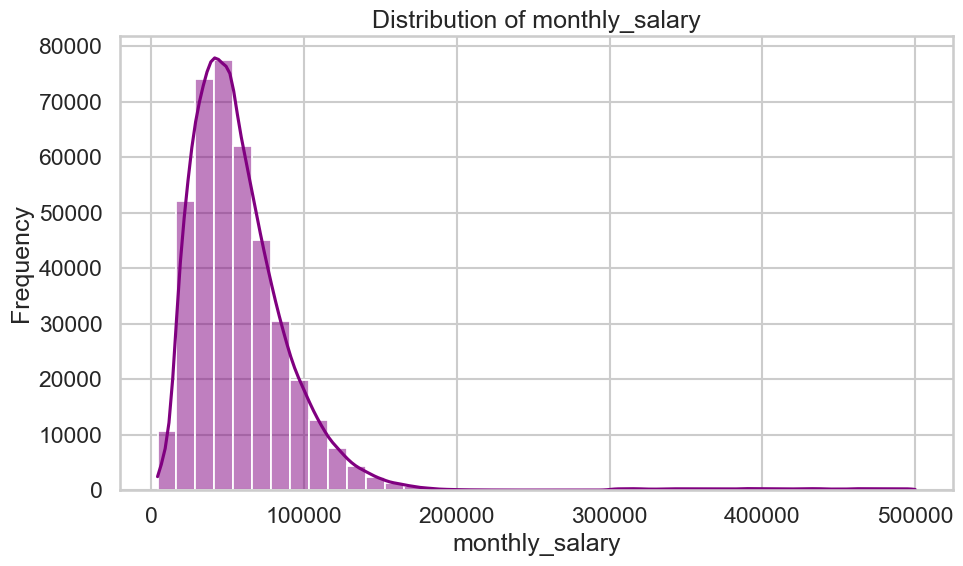

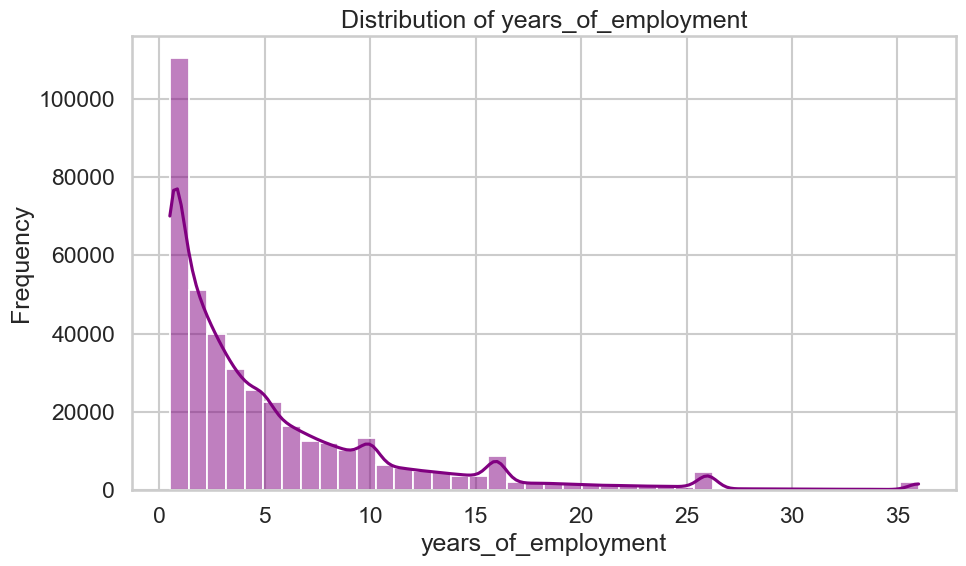

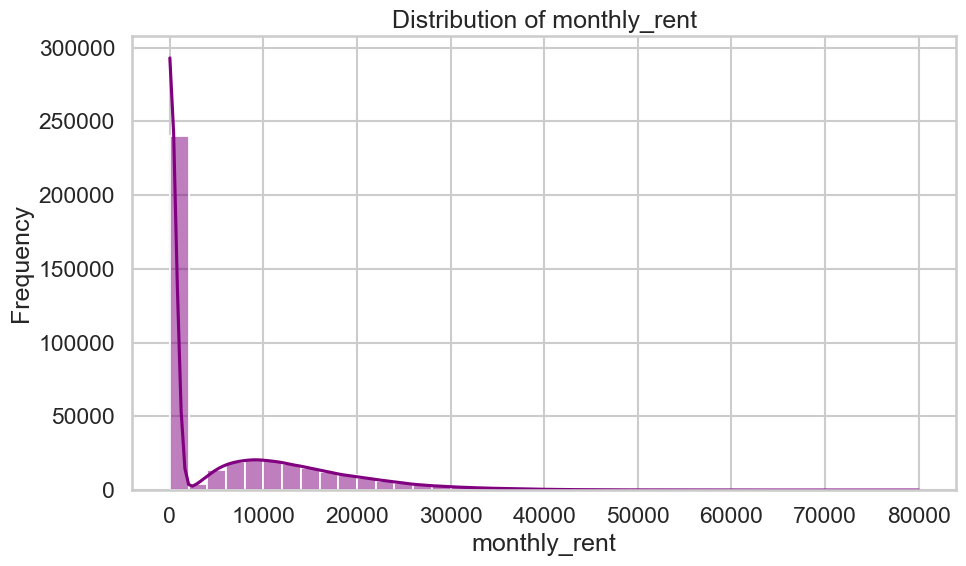

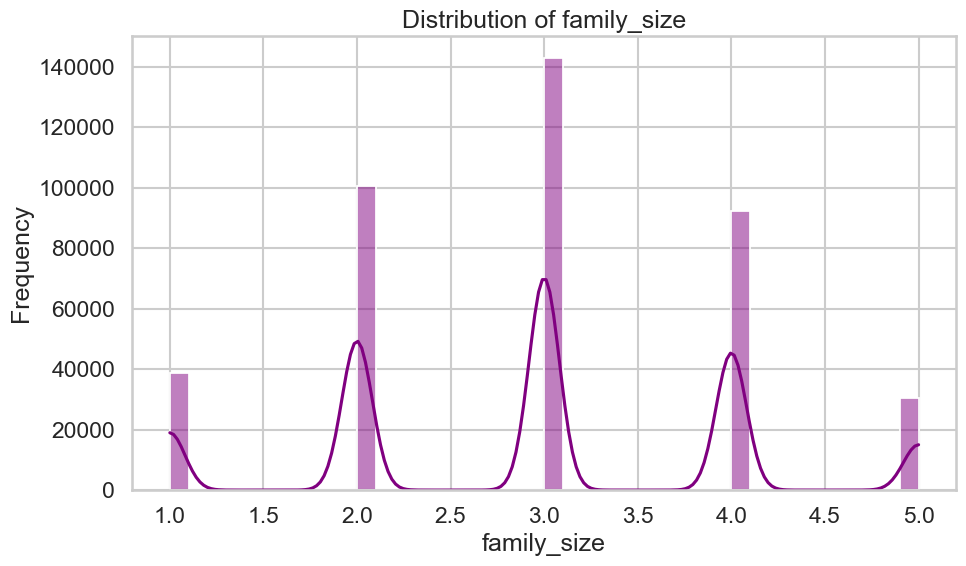

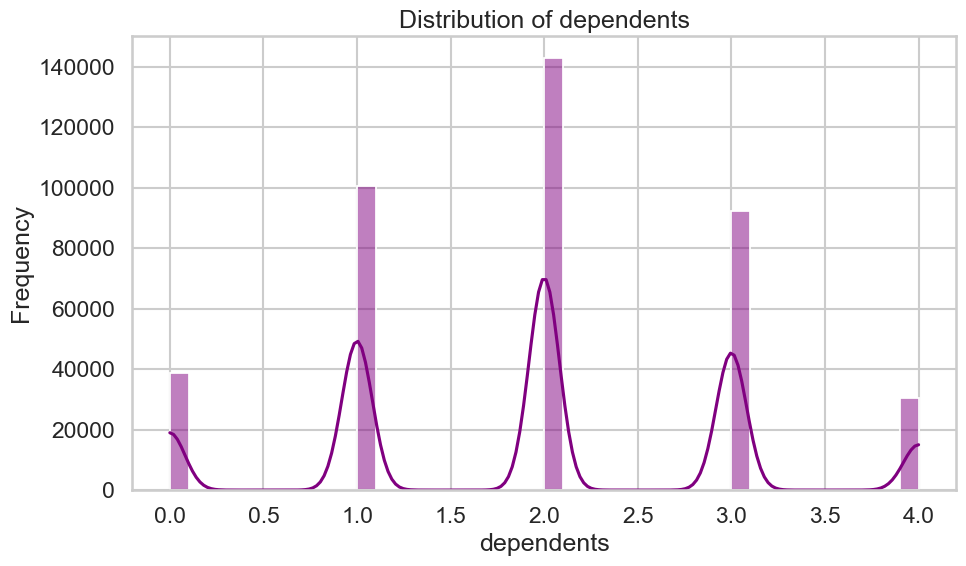

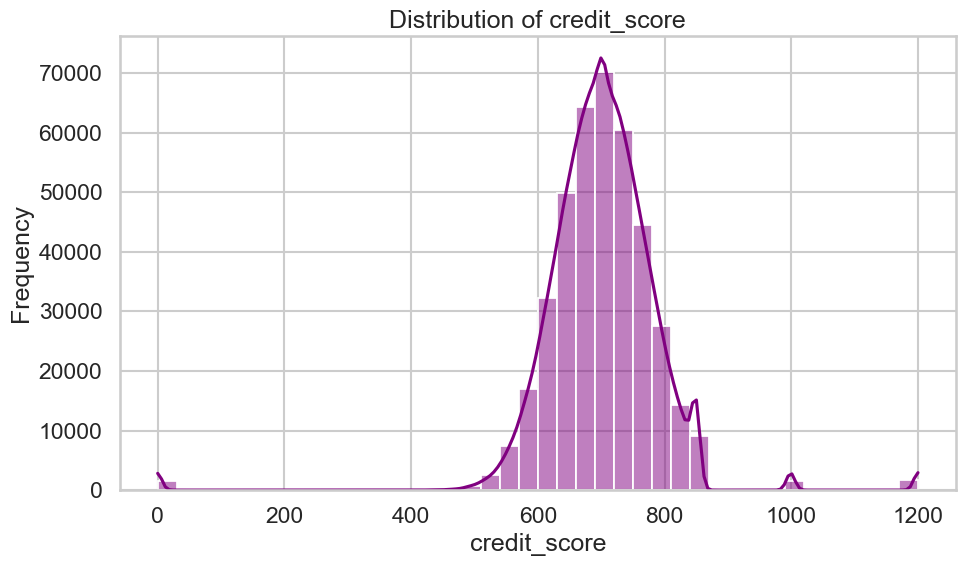

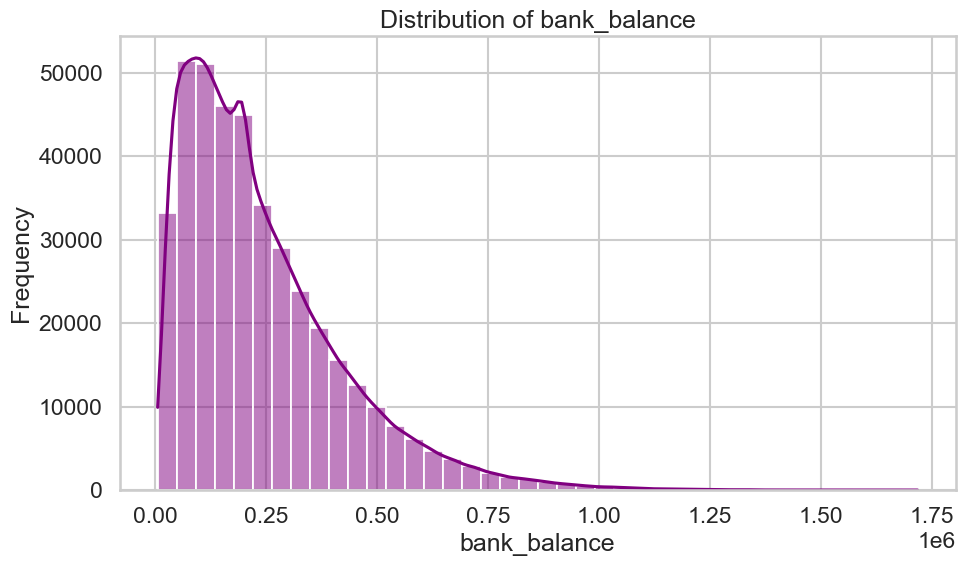

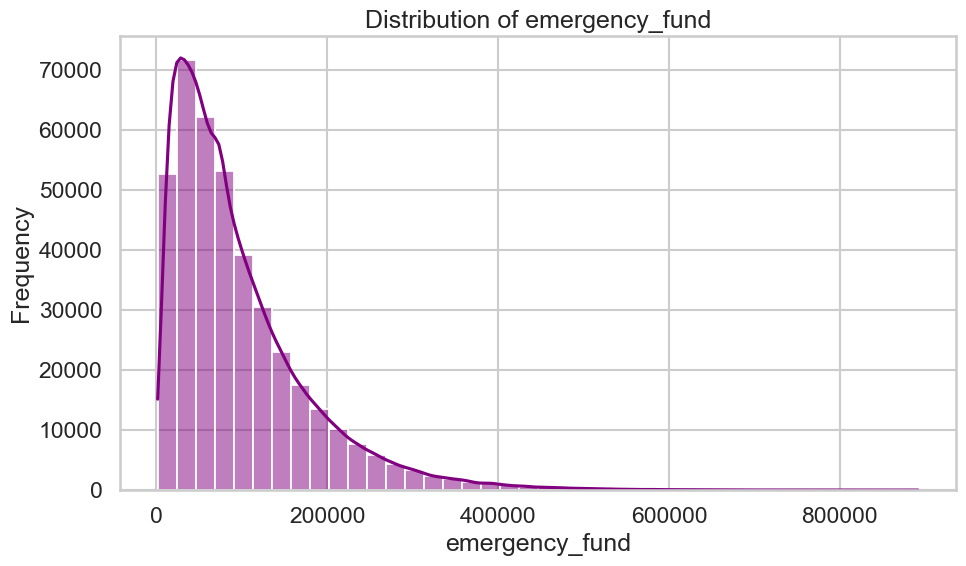

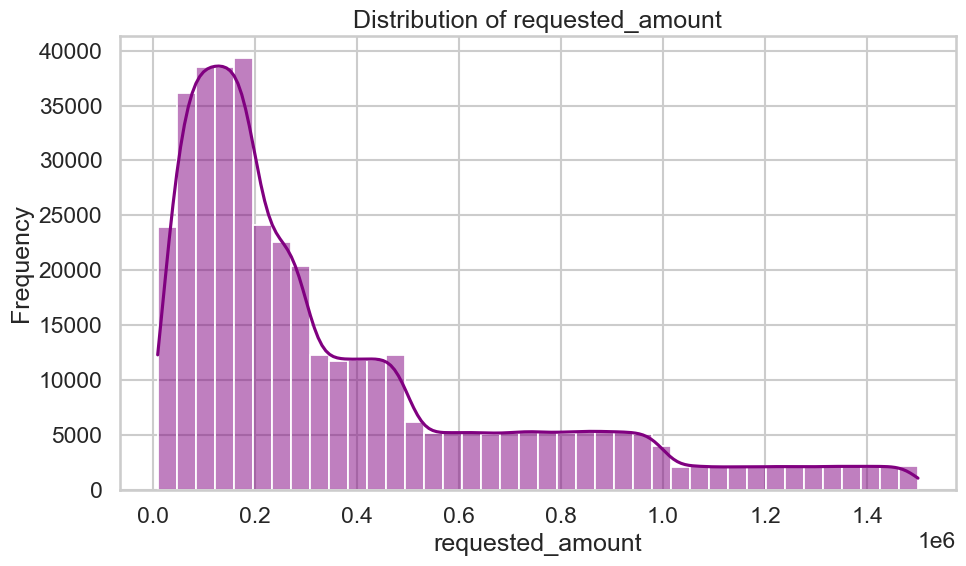

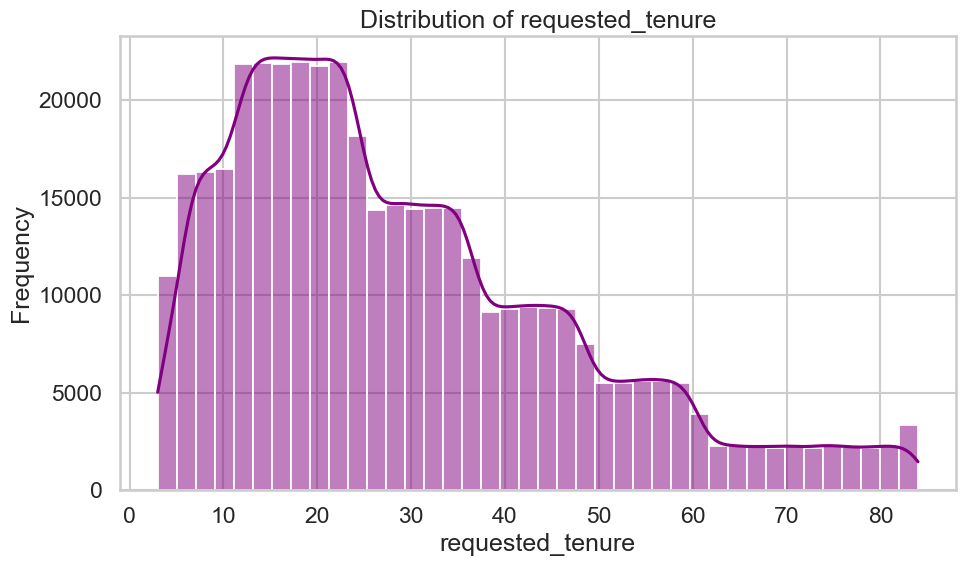

In [13]:
print("--- 3. Univariate Analysis (Numerical Features) ---")

# List of key numerical features
numerical_features = ['age', 'monthly_salary', 'years_of_employment', 
                      'monthly_rent', 'family_size', 'dependents', 
                      'credit_score', 'bank_balance', 'emergency_fund',
                      'requested_amount', 'requested_tenure']

# Get a quick summary table
print("Descriptive Statistics for Numerical Features:")
print(df[numerical_features].describe())
print("\n")

# Create histograms for each
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=40, color='purple')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


--- 4. Bivariate Analysis vs. EMI Eligibility (Classification) ---

--- Categorical Features vs. Eligibility ---


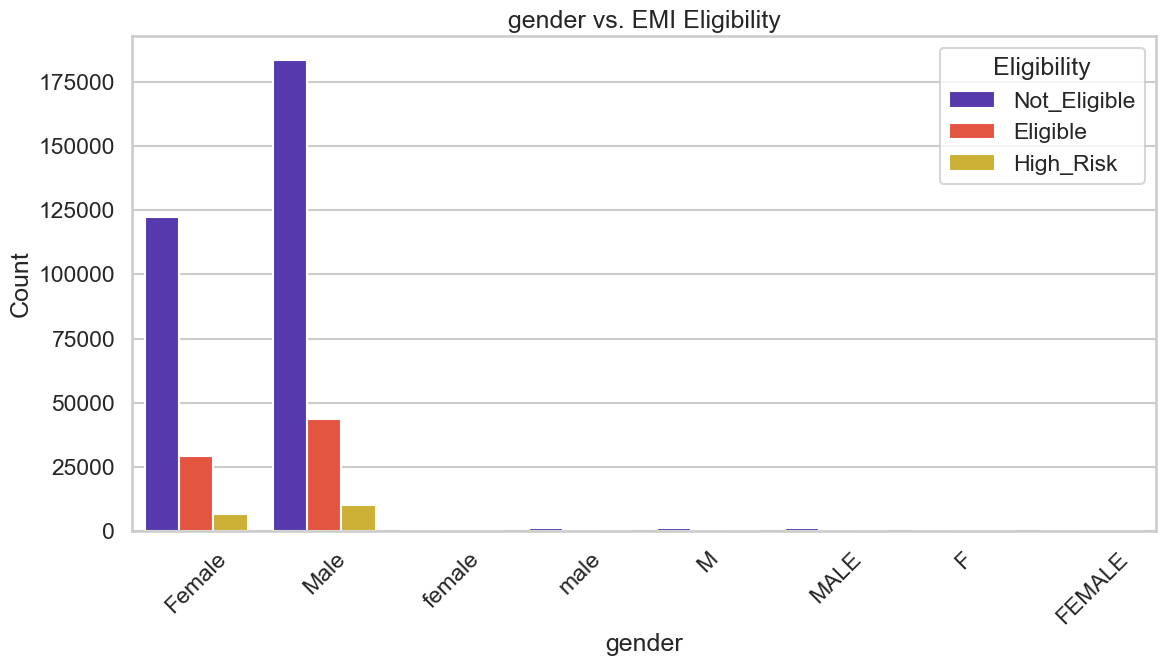

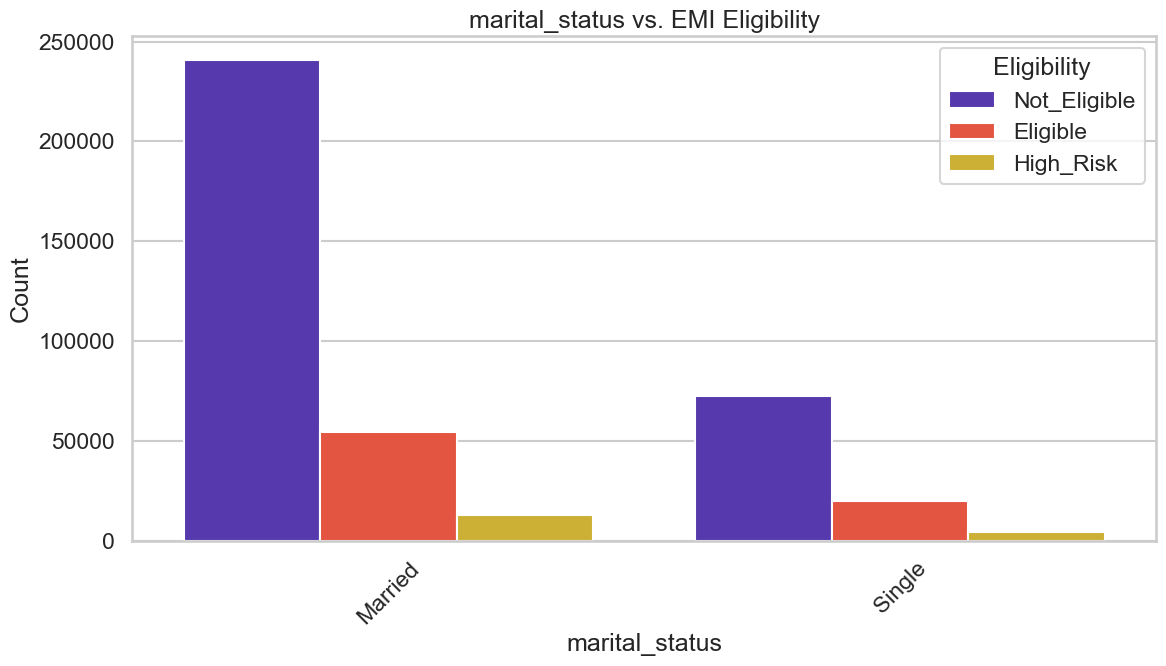

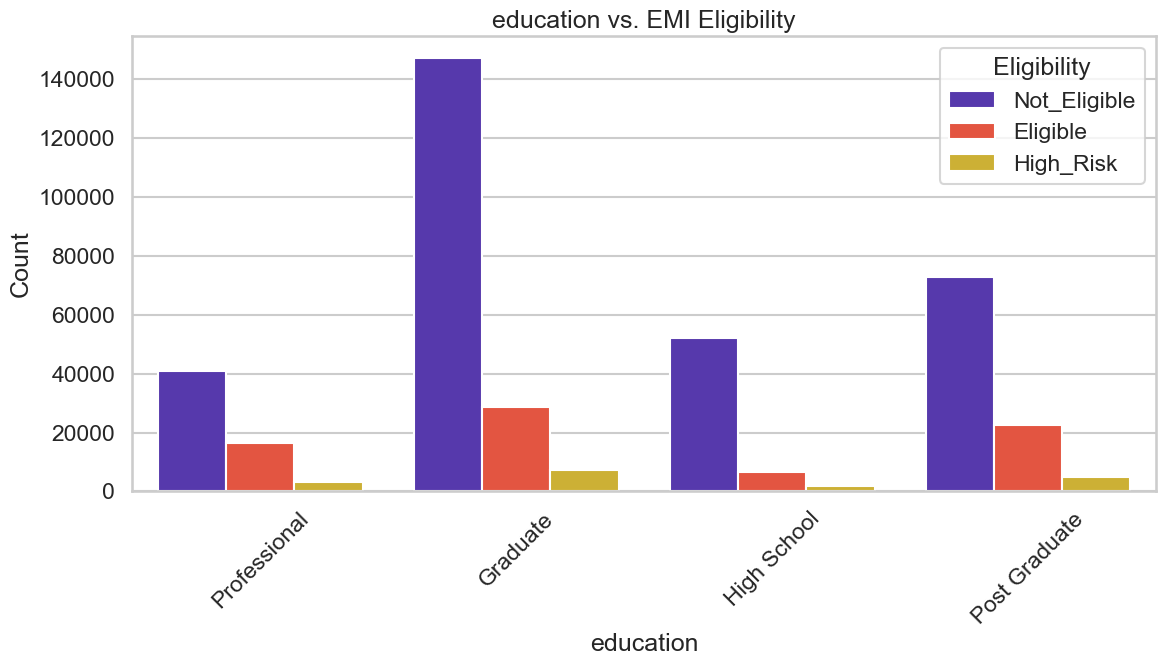

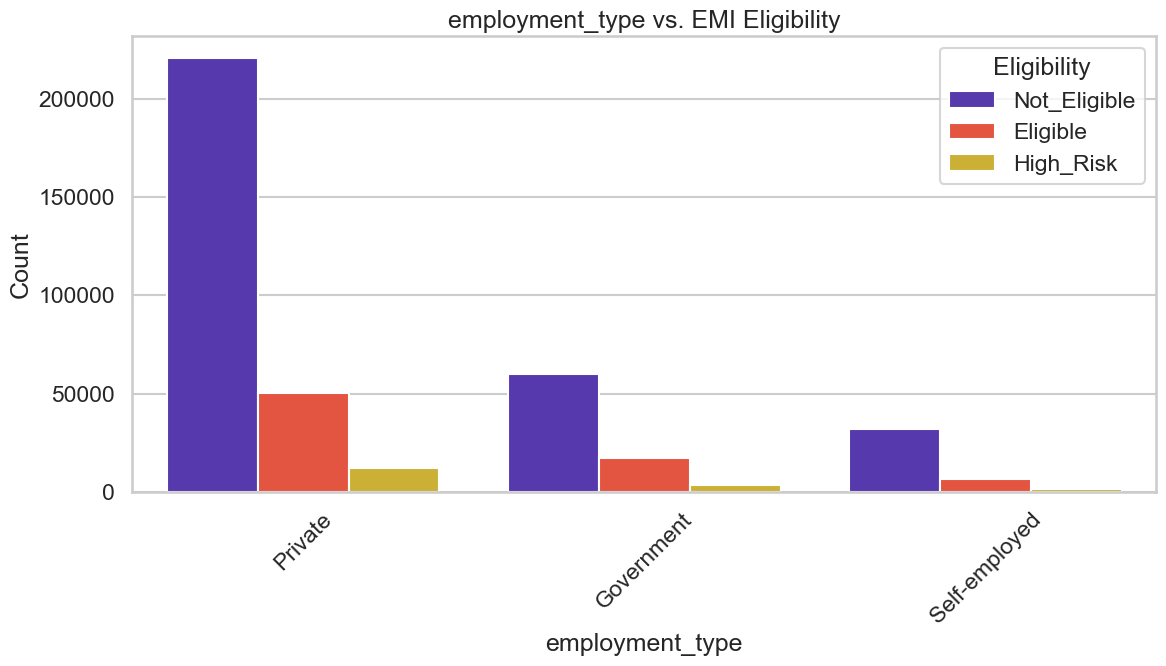

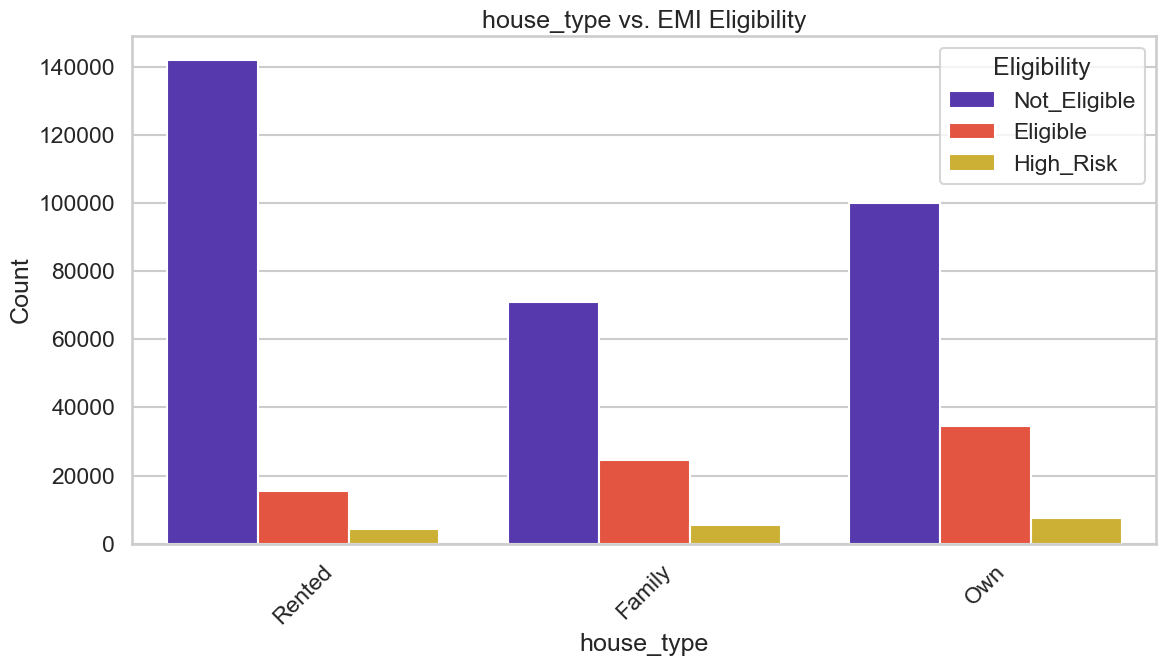

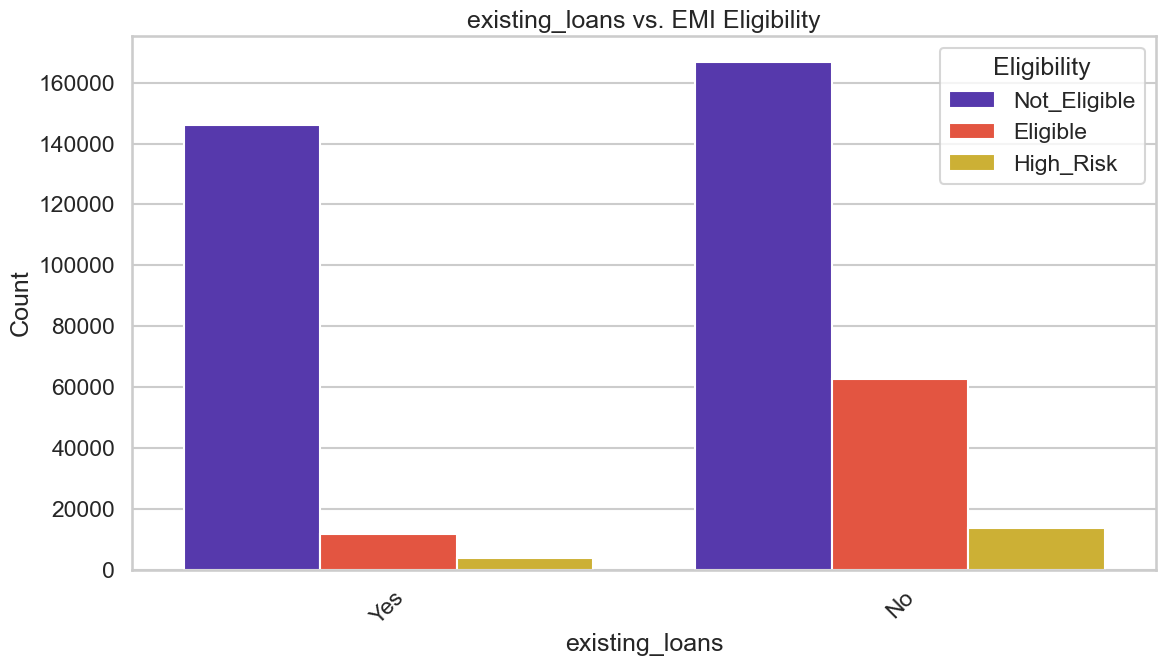

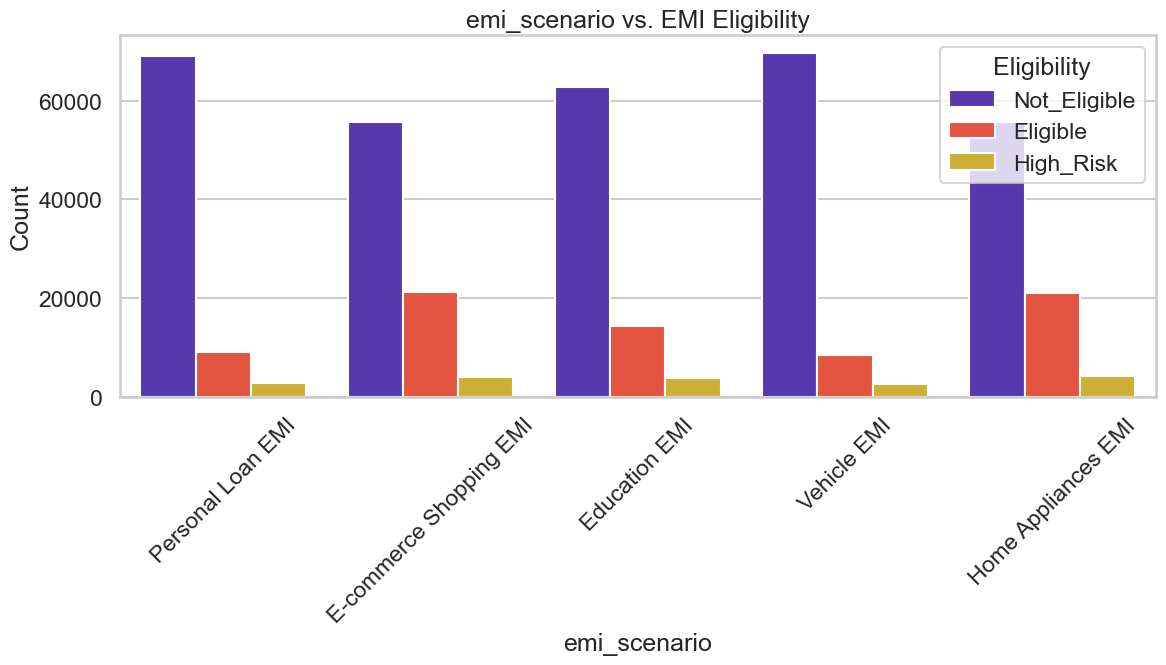


--- Numerical Features vs. Eligibility ---


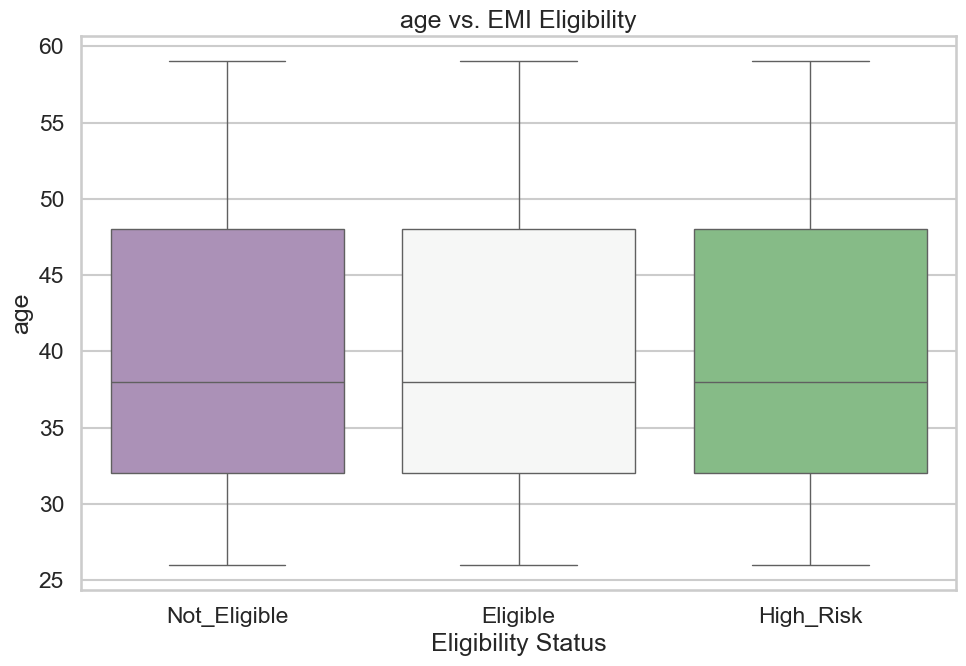

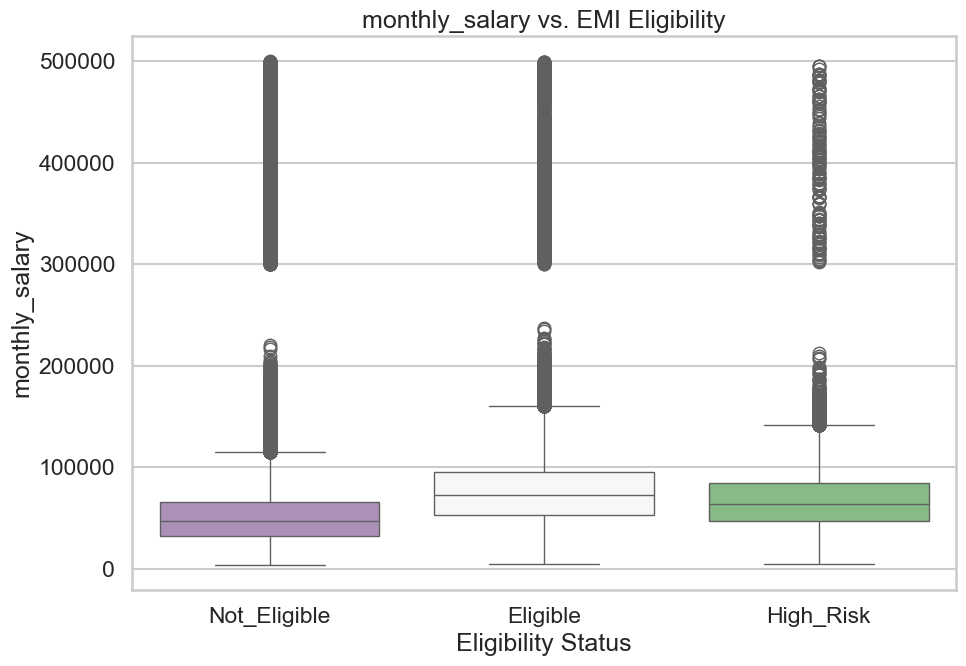

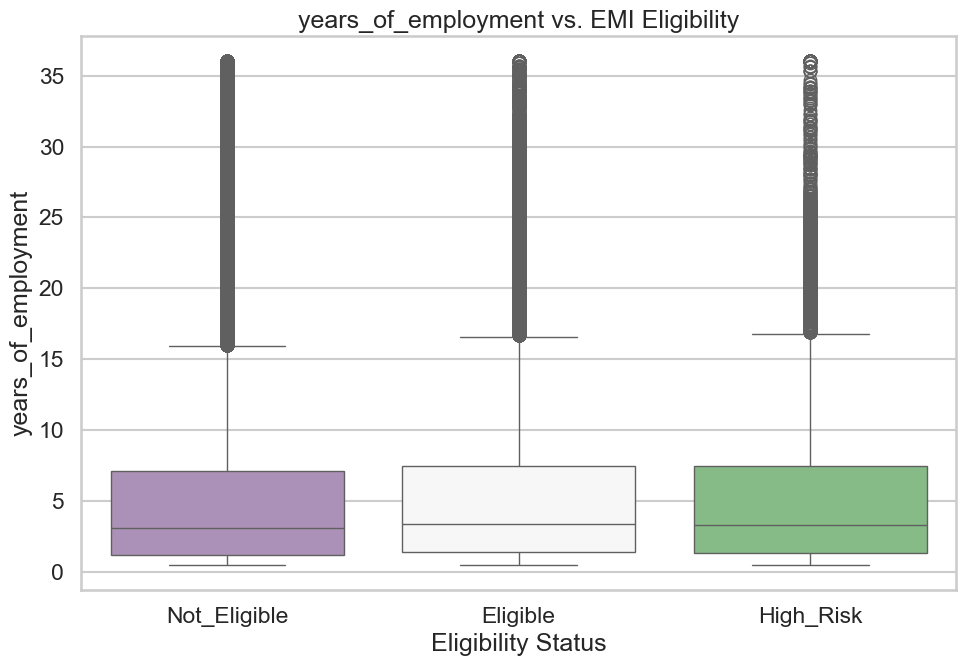

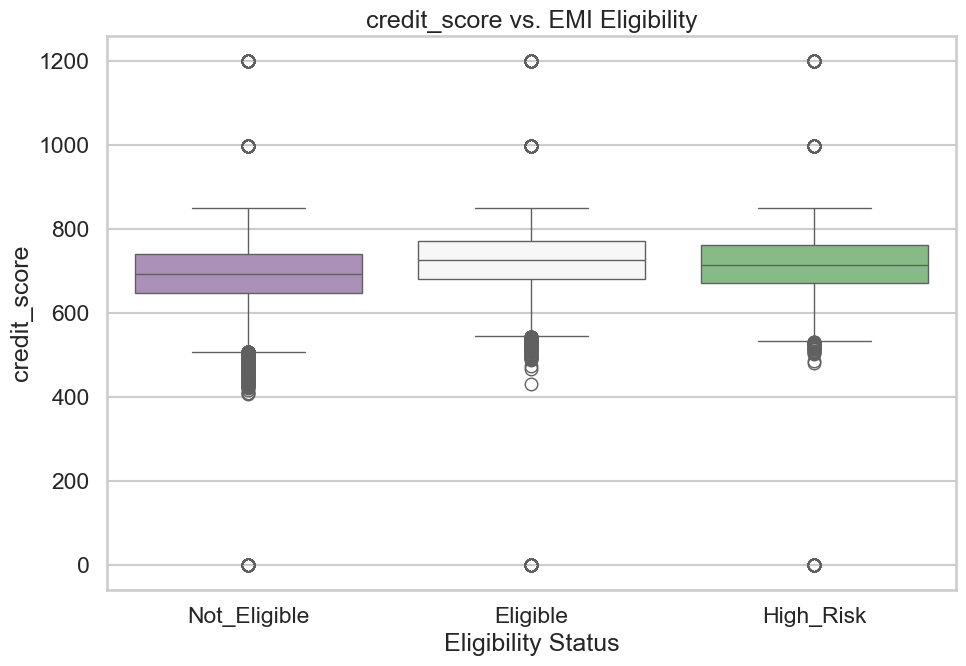

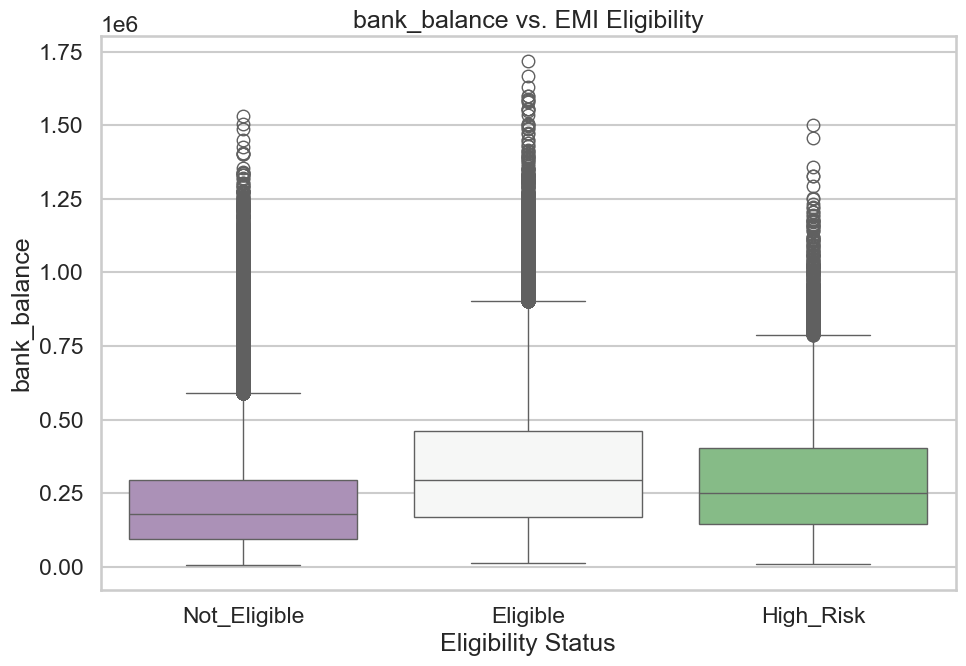

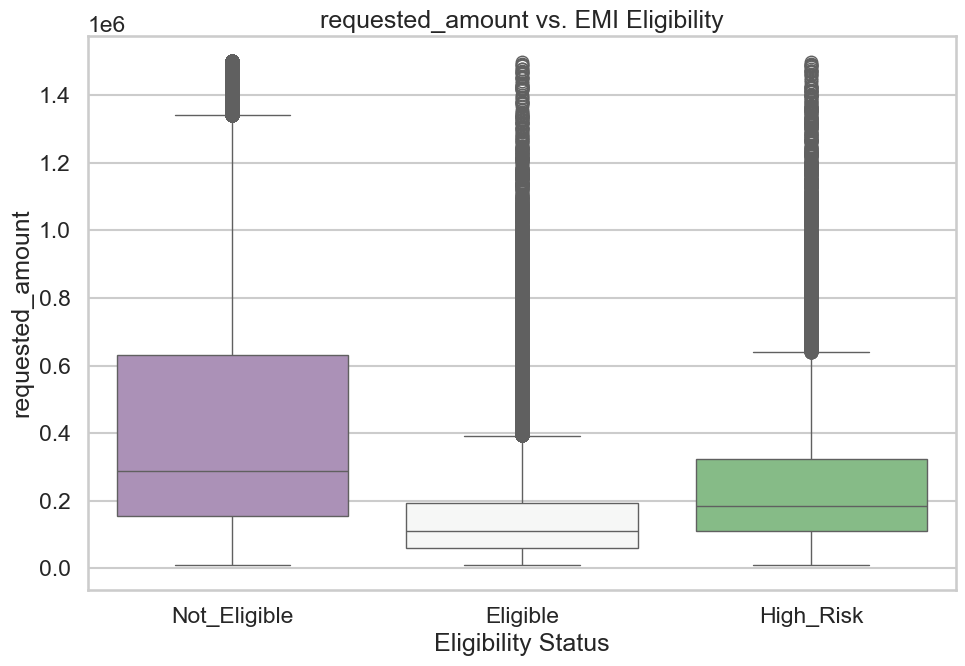

In [14]:
print("--- 4. Bivariate Analysis vs. EMI Eligibility (Classification) ---")

# a) Categorical Features vs. EMI Eligibility
# Using the same list from Cell 3
print("\n--- Categorical Features vs. Eligibility ---")
categorical_features = ['gender', 'marital_status', 'education', 
                        'employment_type', 'house_type', 
                        'existing_loans', 'emi_scenario']

for col in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=col, hue='emi_eligibility', palette='CMRmap')
    plt.title(f'{col} vs. EMI Eligibility')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Eligibility')
    plt.tight_layout()
    plt.show()

# b) Numerical Features vs. EMI Eligibility
# Using the same list from Cell 4
print("\n--- Numerical Features vs. Eligibility ---")
numerical_features = ['age', 'monthly_salary', 'years_of_employment', 
                      'credit_score', 'bank_balance', 'requested_amount']

for col in numerical_features:
    plt.figure(figsize=(10, 7))
    sns.boxplot(data=df, x='emi_eligibility', y=col, palette='PRGn')
    plt.title(f'{col} vs. EMI Eligibility')
    plt.xlabel('Eligibility Status')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

--- 5. Bivariate Analysis vs. Max Monthly EMI (Regression) ---
Taking a 5,000-point sample for scatter plots...


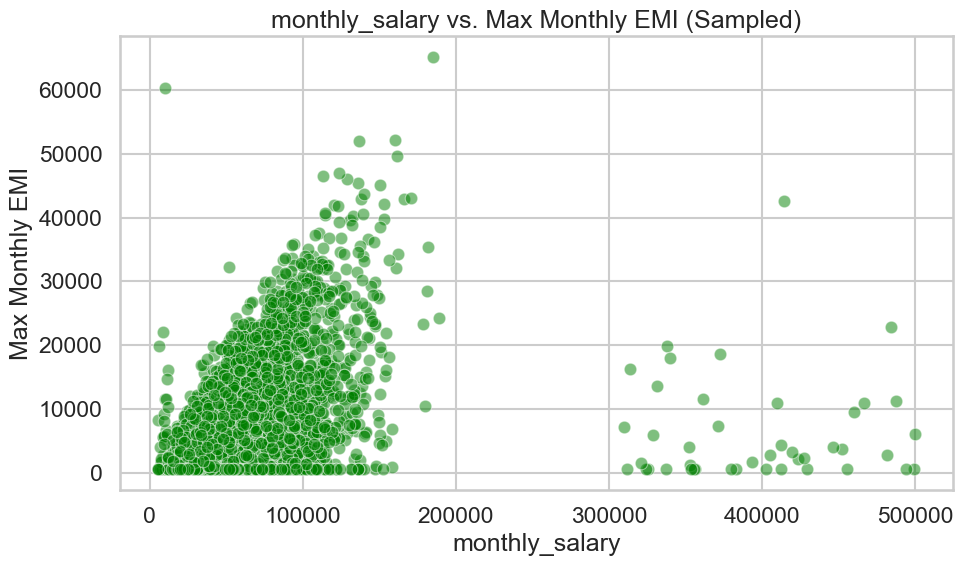

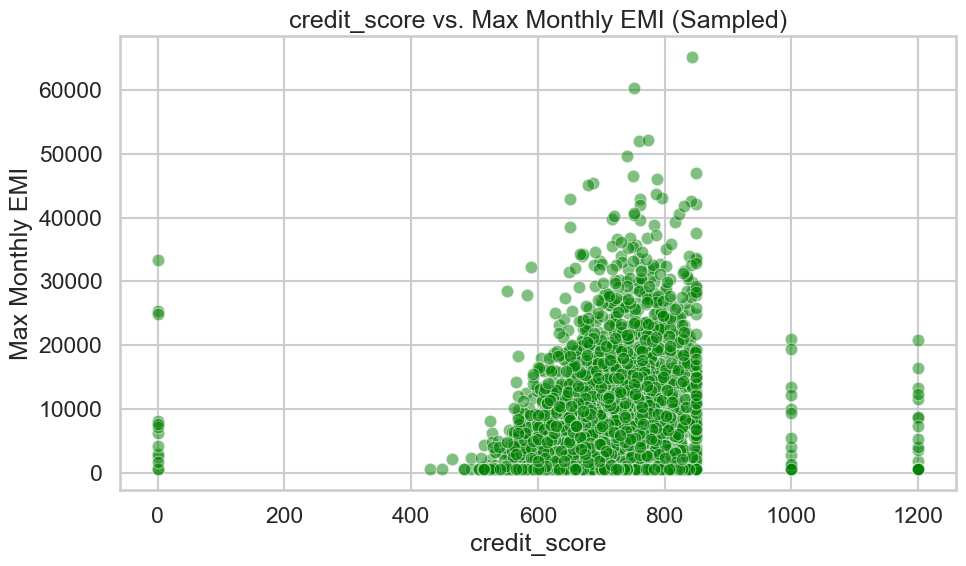

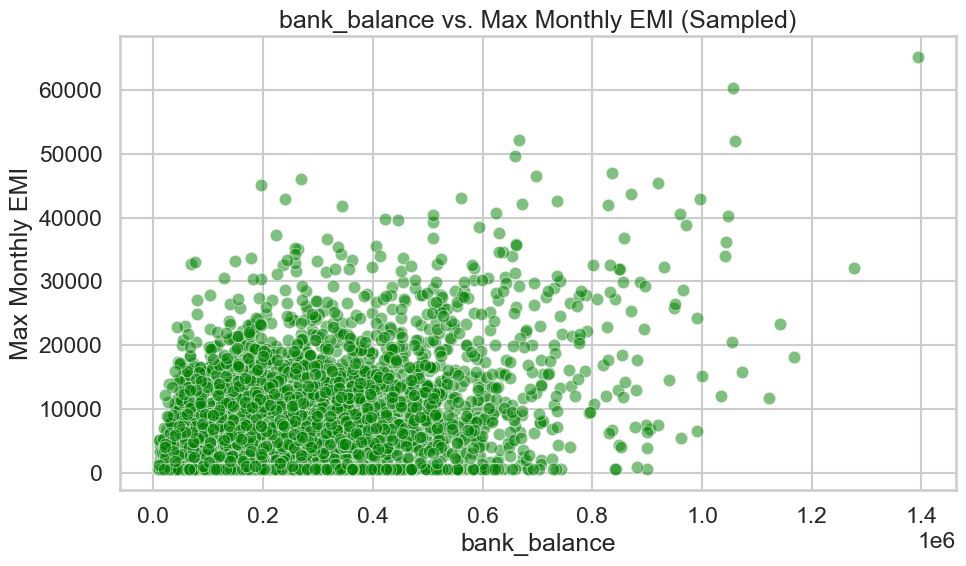

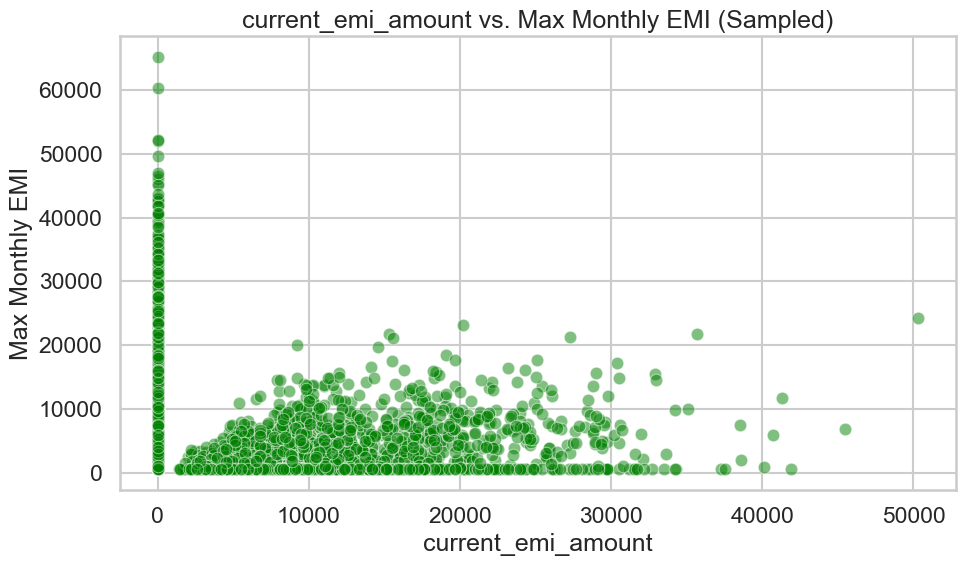

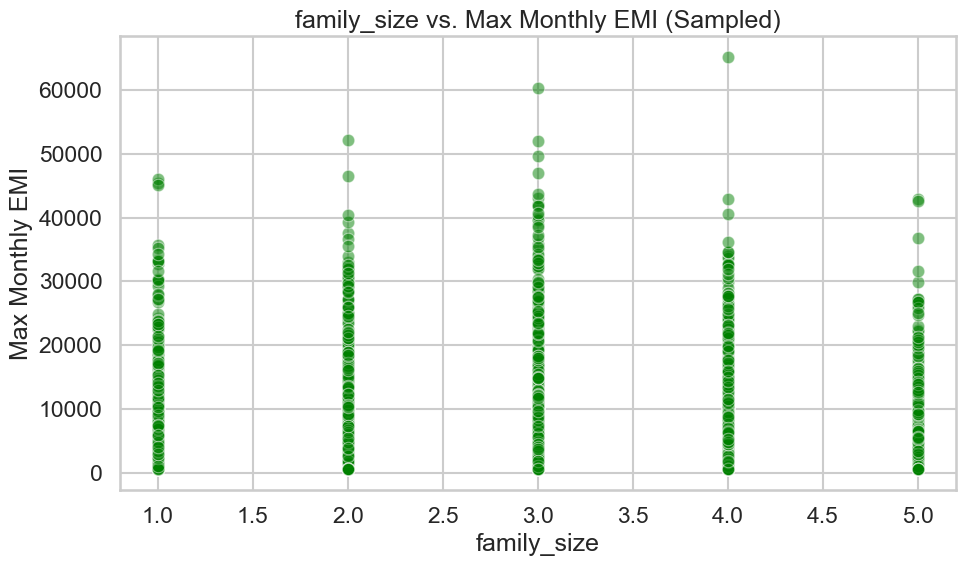

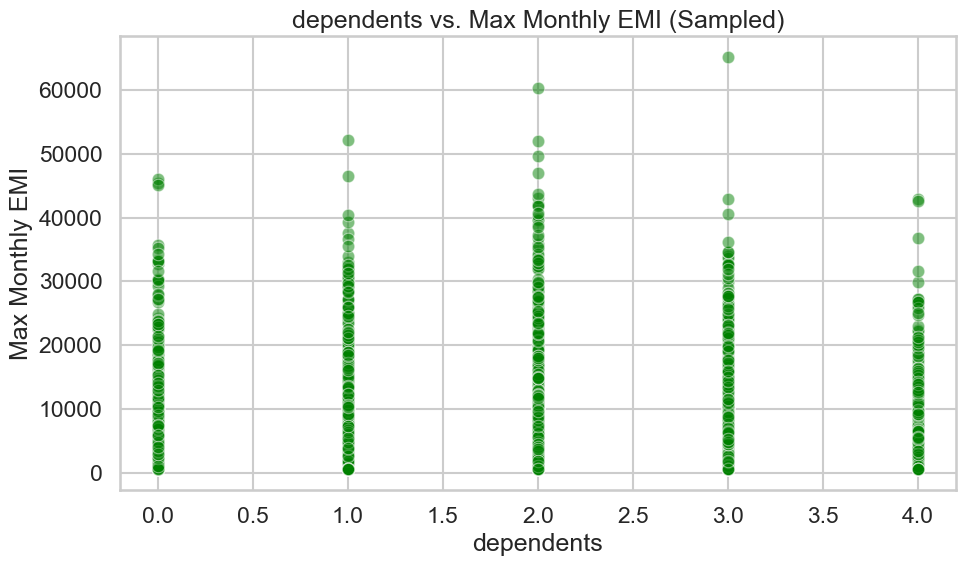

In [15]:
print("--- 5. Bivariate Analysis vs. Max Monthly EMI (Regression) ---")

# Scatter plots can be slow with 400,000 data points.
# Let's use a sample of 5,000 to see the trends.
print("Taking a 5,000-point sample for scatter plots...")
df_sample = df.sample(n=5000, random_state=42)

# Key features to check against the regression target
regression_predictors = ['monthly_salary', 'credit_score', 'bank_balance', 
                         'current_emi_amount', 'family_size', 'dependents']

for col in regression_predictors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_sample, x=col, y='max_monthly_emi', alpha=0.5, color='green')
    plt.title(f'{col} vs. Max Monthly EMI (Sampled)')
    plt.xlabel(col)
    plt.ylabel('Max Monthly EMI')
    plt.tight_layout()
    plt.show()


--- 6. Multivariate Analysis (Correlation Heatmap) ---


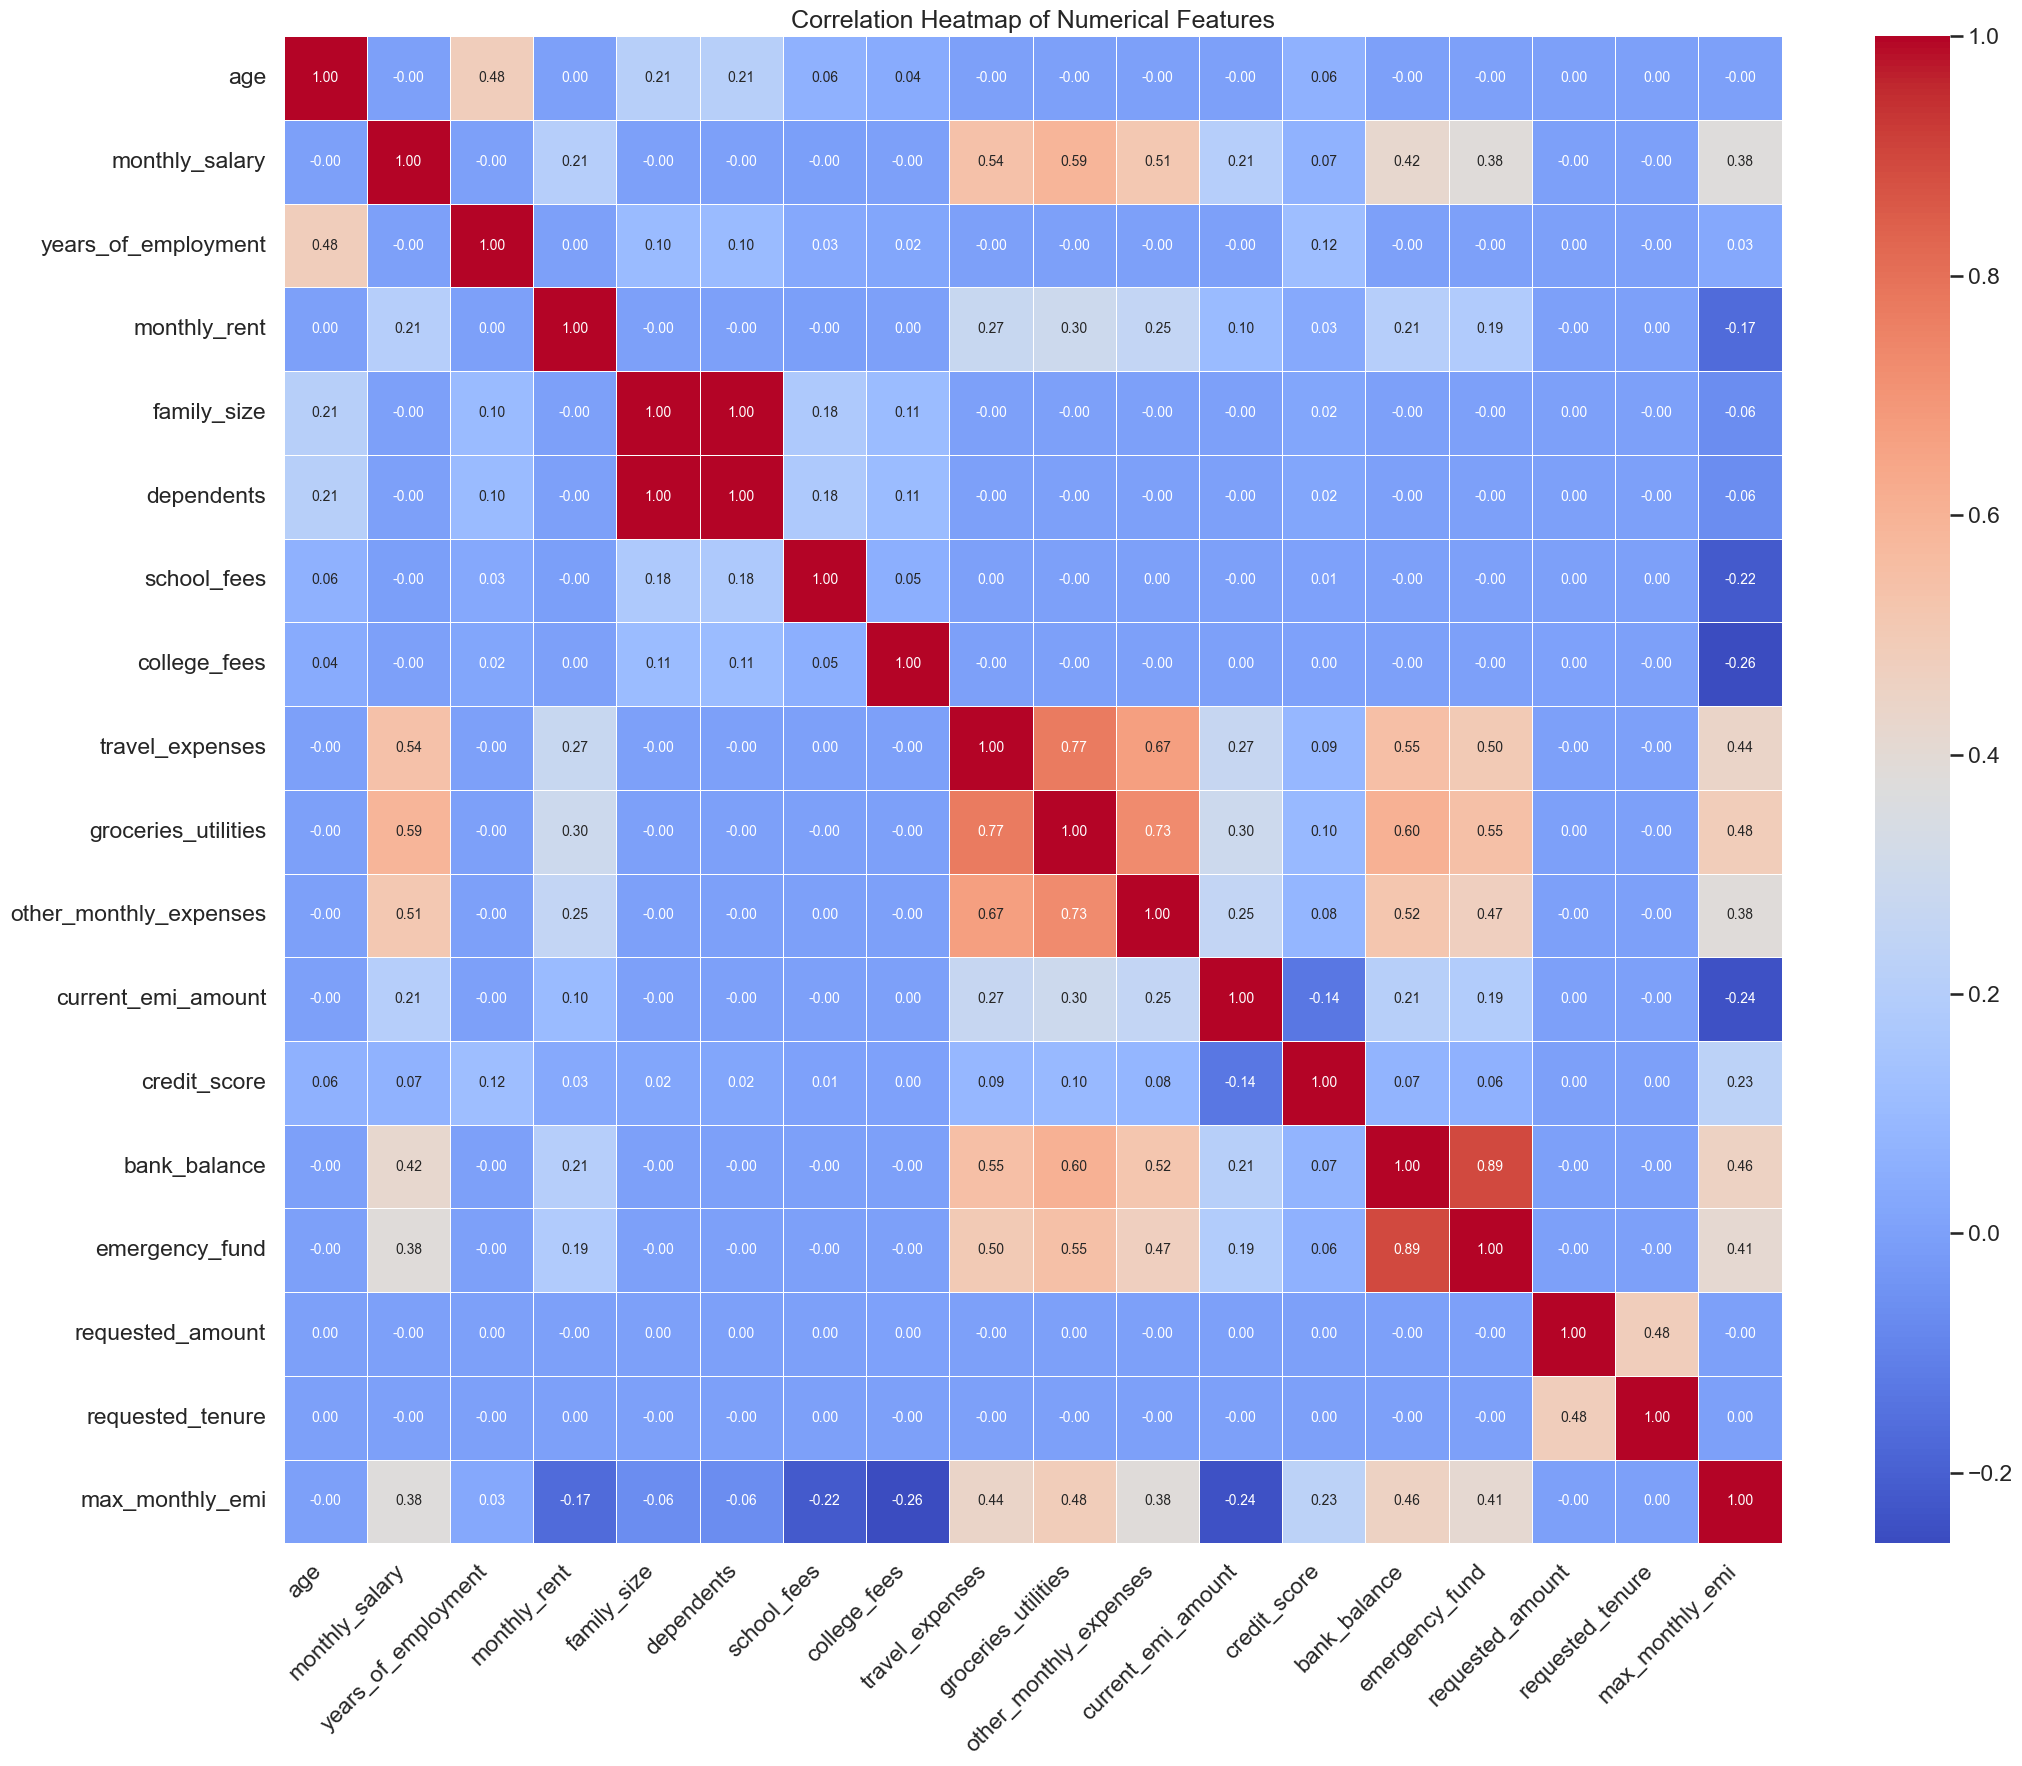

In [16]:
print("--- 6. Multivariate Analysis (Correlation Heatmap) ---")

# Include all numerical features, including targets
all_numerical_cols = ['age', 'monthly_salary', 'years_of_employment', 'monthly_rent',
                      'family_size', 'dependents', 'school_fees', 'college_fees',
                      'travel_expenses', 'groceries_utilities', 'other_monthly_expenses',
                      'current_emi_amount', 'credit_score', 'bank_balance',
                      'emergency_fund', 'requested_amount', 'requested_tenure',
                      'max_monthly_emi'] # Include regression target

# Calculate the correlation matrix
corr_matrix = df[all_numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(22, 18))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            annot_kws={"size": 10}, linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Feature Engineering

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [18]:
# --- 1. Create New Financial Ratios ---
print("Creating new financial features...")

# Handle potential division by zero by replacing 0s with a small number (epsilon)
epsilon = 1e-6 

# a) Total Monthly Expenses
expense_cols = ['monthly_rent', 'school_fees', 'college_fees', 
                'travel_expenses', 'groceries_utilities', 'other_monthly_expenses']
df['total_monthly_expenses'] = df[expense_cols].sum(axis=1)

# b) Debt-to-Income (DTI) Ratio
# Total monthly debt (existing EMI + expenses) vs. monthly salary
df['debt_to_income_ratio'] = (df['current_emi_amount'] + df['total_monthly_expenses']) / (df['monthly_salary'] + epsilon)

# c) Savings-to-Income Ratio
# Total liquid savings vs. monthly salary
df['savings_to_income_ratio'] = (df['bank_balance'] + df['emergency_fund']) / (df['monthly_salary'] + epsilon)

# d) Loan-to-Income Ratio
# How large is the requested loan relative to salary?
df['loan_to_income_ratio'] = df['requested_amount'] / (df['monthly_salary'] + epsilon)

# e) Dependents-to-Family Ratio
df['dependents_ratio'] = df['dependents'] / (df['family_size'] + epsilon)

print(f"Created new features: {['total_monthly_expenses', 'debt_to_income_ratio', 'savings_to_income_ratio', 'loan_to_income_ratio', 'dependents_ratio']}")


Creating new financial features...
Created new features: ['total_monthly_expenses', 'debt_to_income_ratio', 'savings_to_income_ratio', 'loan_to_income_ratio', 'dependents_ratio']


In [19]:
# --- 2. Encode Categorical Variables ---
print("\nEncoding categorical features...")

# a) Clean 'gender' column
print("Cleaning 'gender' column...")
# Convert all to lowercase first to catch 'Male', 'MALE', 'M', 'female', 'F', 'FEMALE' etc.
df['gender'] = df['gender'].astype(str).str.lower()
# Define mapping for all variations to 'Male' or 'Female'
gender_map = {
    'female': 'Female',
    'f': 'Female',
    'male': 'Male',
    'm': 'Male'
}
# Apply .replace() to consolidate the values. 
# This will also correctly handle 'male' -> 'Male' and 'female' -> 'Female'.
df['gender'] = df['gender'].replace(gender_map)
print(f"Cleaned 'gender' unique values: {df['gender'].unique()}")


# b) Binary Encoding (Yes/No)
df['existing_loans'] = df['existing_loans'].map({'Yes': 1, 'No': 0})

# c) Ordinal Encoding (Education)
# Define a logical order for education levels
education_map = {
    'High School': 1,
    'Graduate': 2,
    'Post Graduate': 3,
    'Professional': 4
}
df['education_encoded'] = df['education'].map(education_map)
# d) One-Hot Encoding (Nominal Features)
nominal_cols = ['gender', 'marital_status', 'employment_type', 
                'company_type', 'house_type', 'emi_scenario']
print(f"Applying One-Hot Encoding to: {nominal_cols}")

# Using pd.get_dummies for simplicity. 
# drop_first=True helps reduce multicollinearity for linear models.
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# e) Label Encoding (Classification Target)
print("Label Encoding target variable 'emi_eligibility'...")
le = LabelEncoder()
df_encoded['emi_eligibility_encoded'] = le.fit_transform(df_encoded['emi_eligibility'])

# Print the class mappings (e.g., 0: 'Eligible', 1: 'High_Risk', 2: 'Not_Eligible')
print(f"Target variable 'emi_eligibility' mapping:")
for i, class_name in enumerate(le.classes_):
    print(f"{i}: {class_name}")



Encoding categorical features...
Cleaning 'gender' column...
Cleaned 'gender' unique values: ['Female' 'Male']
Applying One-Hot Encoding to: ['gender', 'marital_status', 'employment_type', 'company_type', 'house_type', 'emi_scenario']
Label Encoding target variable 'emi_eligibility'...
Target variable 'emi_eligibility' mapping:
0: Eligible
1: High_Risk
2: Not_Eligible


In [20]:
# --- 3. Separate Features (X) and Targets (y) ---
print("\nSeparating features (X) and targets (y)...")

# Define the two target columns
target_classification = 'emi_eligibility_encoded'
target_regression = 'max_monthly_emi'

# Drop original text columns and target columns to create X
# Also drop 'education' since we have 'education_encoded'
features_to_drop = ['emi_eligibility', 'education', 
                    target_classification, target_regression]
                      
X = df_encoded.drop(columns=features_to_drop)
y_class = df_encoded[target_classification]
y_reg = df_encoded[target_regression]

# Store all feature names for later
all_feature_names = X.columns.tolist()
print(f"Total number of features after encoding: {len(all_feature_names)}")



Separating features (X) and targets (y)...
Total number of features after encoding: 38


In [21]:
# --- 4. Create Train-Test-Validation Splits (70-15-15) ---
print("Splitting data into train, validation, and test sets...")

# Combine y targets for splitting
y = pd.DataFrame({'class': y_class, 'reg': y_reg})

# First split: 70% train, 30% temp (for val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y['class']
)

# Second split: 50% of temp into val, 50% into test (15% and 15% of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp['class']
)

# Separate the y targets back into individual variables
y_train_class, y_train_reg = y_train['class'], y_train['reg']
y_val_class, y_val_reg = y_val['class'], y_val['reg']
y_test_class, y_test_reg = y_test['class'], y_test['reg']

print(f"Training set:   X={X_train.shape}, y_class={y_train_class.shape}, y_reg={y_train_reg.shape}")
print(f"Validation set: X={X_val.shape}, y_class={y_val_class.shape}, y_reg={y_val_reg.shape}")
print(f"Test set:       X={X_test.shape}, y_class={y_test_class.shape}, y_reg={y_test_reg.shape}")


Splitting data into train, validation, and test sets...
Training set:   X=(283360, 38), y_class=(283360,), y_reg=(283360,)
Validation set: X=(60720, 38), y_class=(60720,), y_reg=(60720,)
Test set:       X=(60720, 38), y_class=(60720,), y_reg=(60720,)


In [22]:
# --- 5. Apply Feature Scaling ---
print("\nApplying StandardScaler to numerical features...")

# Identify numerical columns (all columns that aren't True/False or 0/1 from one-hot)
# We scale the original numerical cols AND the new ratios we made.
numerical_cols = [
    'age', 'monthly_salary', 'years_of_employment', 'monthly_rent', 
    'family_size', 'dependents', 'school_fees', 'college_fees', 
    'travel_expenses', 'groceries_utilities', 'other_monthly_expenses', 
    'existing_loans', 'current_emi_amount', 'credit_score', 'bank_balance', 
    'emergency_fund', 'requested_amount', 'requested_tenure', 
    'education_encoded', 'total_monthly_expenses', 'debt_to_income_ratio', 
    'savings_to_income_ratio', 'loan_to_income_ratio', 'dependents_ratio'
]

# Ensure we only scale columns that actually exist in X
# (This handles any potential errors if a col name is wrong)
numerical_cols_to_scale = [col for col in numerical_cols if col in X_train.columns]
print(f"Found {len(numerical_cols_to_scale)} numerical columns to scale.")

# Initialize StandardScaler
scaler = StandardScaler()

# Fit ONLY on the training data
scaler.fit(X_train[numerical_cols_to_scale])

# Transform train, val, and test sets
# Create copies to avoid SettingWithCopyWarning
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols_to_scale] = scaler.transform(X_train[numerical_cols_to_scale])
X_val_scaled[numerical_cols_to_scale] = scaler.transform(X_val[numerical_cols_to_scale])
X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("StandardScaling complete.")
print("\n--- Feature Engineering Complete! ---")
print("You are now ready for model training.")


Applying StandardScaler to numerical features...
Found 24 numerical columns to scale.
StandardScaling complete.

--- Feature Engineering Complete! ---
You are now ready for model training.


In [23]:
print("\nHead of X_train_scaled (model-ready data):")
X_train_scaled.head()


Head of X_train_scaled (model-ready data):


,age,monthly_salary,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,requested_amount,requested_tenure,total_monthly_expenses,debt_to_income_ratio,savings_to_income_ratio,loan_to_income_ratio,dependents_ratio,education_encoded,gender_Male,marital_status_Single,employment_type_Private,employment_type_Self-employed,company_type_MNC,company_type_Mid-size,company_type_Small,company_type_Startup,house_type_Own,house_type_Rented,emi_scenario_Education EMI,emi_scenario_Home Appliances EMI,emi_scenario_Personal Loan EMI,emi_scenario_Vehicle EMI
248541,-1.276582,-0.333490,-0.800871,-0.670695,-0.875182,-0.875182,-0.912808,-0.555774,-0.437810,-0.615355,-0.847437,-0.816184,-0.647303,1.386298,-0.877746,-0.837107,1.668753,1.648838,-1.186727,-0.803893,-0.677991,1.076824,-0.422123,1.752980,False,True,True,False,False,True,False,False,False,False,False,False,True,False
247208,-1.276582,-0.917868,-0.570120,-0.265079,0.054862,0.054862,-0.912808,-0.555774,-0.880792,-1.231732,-0.714222,-0.816184,-0.647303,-0.791652,-0.966331,-1.020095,3.059479,-0.837022,-1.270535,-0.221861,-0.393963,5.560941,0.351462,-0.432711,True,True,True,False,False,True,False,False,False,True,False,False,False,True
385526,0.979734,0.070724,1.490157,-0.670695,0.054862,0.054862,-0.004699,0.769174,-0.290150,0.316378,-0.136955,-0.816184,-0.647303,-0.349256,0.852133,1.251183,-0.333313,-0.781781,0.021091,-0.344274,0.586844,-0.401979,0.351462,0.660135,True,False,True,False,False,True,False,False,False,False,False,True,False,False
328557,-0.739364,-0.783900,-0.026207,0.128948,0.054862,0.054862,0.429614,1.192611,-1.205645,-0.930711,-1.136071,1.225213,-0.205486,0.240606,-1.040610,-1.051006,1.338455,1.317390,-0.181034,1.071811,-0.671373,2.090898,0.351462,-1.525556,True,False,False,True,True,False,False,False,False,True,False,False,True,False
50061,2.054170,-0.243408,-0.603084,-0.670695,-0.875182,-0.875182,0.942892,-0.555774,-0.378746,-0.256996,-1.025058,1.225213,0.336096,0.240606,-0.818323,-0.519351,-0.599869,0.046839,-0.629652,-0.263512,-0.579122,-0.466739,-0.422123,-1.525556,False,False,False,False,True,False,False,False,True,False,False,False,False,True


### Model Training and MLFlow Tracking

In [24]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
)
import warnings
import joblib

warnings.filterwarnings('ignore')
print("MLflow version:", mlflow.__version__)

MLflow version: 3.5.1


In [25]:
# Set the experiment name. MLflow will create it if it doesn't exist.
EXPERIMENT_NAME = "EMIPredict_Al_v1"
mlflow.set_experiment(EXPERIMENT_NAME)

print(f"MLflow experiment set to: '{EXPERIMENT_NAME}'")

MLflow experiment set to: 'EMIPredict_Al_v1'


In [26]:
# --- Helper function for Regression Metrics ---
def eval_regression_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return {"rmse": rmse, "mae": mae, "r2": r2, "mape": mape}

In [27]:
# --- Helper function for Classification Metrics ---
def eval_classification_metrics(y_true, y_pred, y_prob, num_classes):
    acc = accuracy_score(y_true, y_pred)
    
    # Calculate precision, recall, f1 for 'macro' average
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro'
    )
    
    # Calculate ROC-AUC. 
    # For multi-class, we need to specify 'ovr' (one-vs-rest) and use probabilities
    if num_classes > 2:
        roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr', average='macro')
    else:
        # Fallback for binary (though our case is multi-class)
        roc_auc = roc_auc_score(y_true, y_prob[:, 1], average='macro')

    return {
        "accuracy": acc,
        "precision_macro": precision_macro,
        "recall_macro": recall_macro,
        "f1_macro": f1_macro,
        "roc_auc_macro": roc_auc
    }

# --- Helper to save the LabelEncoder ---
# We need to save this to decode our predictions later!
# Assuming 'le' is the LabelEncoder() object from Step 3
try:
    joblib.dump(le, 'label_encoder.joblib')
    print("LabelEncoder saved as 'label_encoder.joblib'")
except NameError:
    print("Warning: 'le' (LabelEncoder) not found. Please re-run Step 3 or save it manually.")

# --- Helper to save the StandardScaler ---
# We need this for new, raw data in production!
try:
    joblib.dump(scaler, 'standard_scaler.joblib')
    print("StandardScaler saved as 'standard_scaler.joblib'")
except NameError:
    print("Warning: 'scaler' (StandardScaler) not found. Please re-run Step 3 or save it manually.")

# --- Helper to save the feature list ---
try:
    with open('feature_names.txt', 'w') as f:
        for item in all_feature_names: # 'all_feature_names' from Step 3
            f.write(f"{item}\n")
    print("Feature names saved as 'feature_names.txt'")
except NameError:
     print("Warning: 'all_feature_names' not found. Please re-run Step 3 or save it manually.")

LabelEncoder saved as 'label_encoder.joblib'
StandardScaler saved as 'standard_scaler.joblib'
Feature names saved as 'feature_names.txt'


In [28]:
# --- Train Baseline Models ---
print("--- Training Baseline Models (Logistic & Linear Regression) ---")

try:
    # Start a new MLflow run. This will be automatically closed.
    with mlflow.start_run(run_name="Baseline_Models") as run:
        print(f"Starting MLflow Run ID: {run.info.run_id}")
        mlflow.log_param("model_type", "Baseline")
        
        # --- 1. Logistic Regression (Classification) ---
        print("Training LogisticRegression...")
        lr_params = {
            "solver": "lbfgs",
            "max_iter": 1000,
            "multi_class": "multinomial",
            "random_state": 42
        }
        mlflow.log_params(lr_params)
        
        lr = LogisticRegression(**lr_params)
        lr.fit(X_train_scaled, y_train_class)
        
        # Evaluate on validation set
        y_pred_class_lr = lr.predict(X_val_scaled)
        y_prob_class_lr = lr.predict_proba(X_val_scaled)
        
        class_metrics_lr = eval_classification_metrics(y_val_class, y_pred_class_lr, y_prob_class_lr, num_classes=len(le.classes_))
        
        # Log metrics with a prefix
        mlflow.log_metrics({f"val_lr_{k}": v for k, v in class_metrics_lr.items()})
        print(f"LogisticRegression Val Metrics: {class_metrics_lr}")

        # Log the model
        mlflow.sklearn.log_model(lr, "logistic_regression_model")

        # --- 2. Linear Regression (Regression) ---
        print("\nTraining LinearRegression...")
        lin_reg = LinearRegression()
        
        lin_reg.fit(X_train_scaled, y_train_reg)
        
        # Evaluate on validation set
        y_pred_reg_lin = lin_reg.predict(X_val_scaled)
        
        reg_metrics_lin = eval_regression_metrics(y_val_reg, y_pred_reg_lin)
        
        # Log metrics with a prefix
        mlflow.log_metrics({f"val_linreg_{k}": v for k, v in reg_metrics_lin.items()})
        print(f"LinearRegression Val Metrics: {reg_metrics_lin}")
        
        # Log the model
        mlflow.sklearn.log_model(lin_reg, "linear_regression_model")
        
        print("\n--- Baseline Models Run Complete ---")

except Exception as e:
    print(f"\nAn error occurred during the baseline run: {e}")

--- Training Baseline Models (Logistic & Linear Regression) ---
Starting MLflow Run ID: 8521b7d1f68f403f8c6c3f204931d143
Training LogisticRegression...


2025/11/04 13:37:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


LogisticRegression Val Metrics: {'accuracy': 0.898929512516469, 'precision_macro': 0.6280991852188578, 'recall_macro': 0.5971680607232043, 'f1_macro': 0.5854904054469526, 'roc_auc_macro': 0.9370074925373445}


2025/11/04 13:37:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training LinearRegression...


2025/11/04 13:37:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


LinearRegression Val Metrics: {'rmse': np.float64(4131.790669608791), 'mae': 2953.2036003496924, 'r2': 0.7178172442628977, 'mape': 1.8954925558842575}


2025/11/04 13:37:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



--- Baseline Models Run Complete ---


In [29]:
# --- Train Random Forest Models ---
print("\n--- Training Advanced Models (Random Forest) ---")

try:
    with mlflow.start_run(run_name="RandomForest") as run:
        print(f"Starting MLflow Run ID: {run.info.run_id}")
        mlflow.log_param("model_type", "RandomForest")
        
        # --- 1. Random Forest Classifier ---
        print("Training RandomForestClassifier...")
        rfc_params = {
            "n_estimators": 100,  # You can start with 100
            "max_depth": 10,      # Limit depth to prevent overfitting
            "random_state": 42,
            "n_jobs": -1          # Use all available cores
        }
        mlflow.log_params(rfc_params)
        
        rfc = RandomForestClassifier(**rfc_params)
        rfc.fit(X_train_scaled, y_train_class)
        
        # Evaluate on validation set
        y_pred_class_rfc = rfc.predict(X_val_scaled)
        y_prob_class_rfc = rfc.predict_proba(X_val_scaled)
        
        class_metrics_rfc = eval_classification_metrics(y_val_class, y_pred_class_rfc, y_prob_class_rfc, num_classes=len(le.classes_))
        
        mlflow.log_metrics({f"val_rfc_{k}": v for k, v in class_metrics_rfc.items()})
        print(f"RandomForestClassifier Val Metrics: {class_metrics_rfc}")

        mlflow.sklearn.log_model(rfc, "random_forest_classifier_model")

        # --- 2. Random Forest Regressor ---
        print("\nTraining RandomForestRegressor...")
        rfr_params = {
            "n_estimators": 100,
            "max_depth": 10,
            "random_state": 42,
            "n_jobs": -1
        }
        mlflow.log_params(rfr_params)
        
        rfr = RandomForestRegressor(**rfr_params)
        rfr.fit(X_train_scaled, y_train_reg)
        
        # Evaluate on validation set
        y_pred_reg_rfr = rfr.predict(X_val_scaled)
        
        reg_metrics_rfr = eval_regression_metrics(y_val_reg, y_pred_reg_rfr)
        
        mlflow.log_metrics({f"val_rfr_{k}": v for k, v in reg_metrics_rfr.items()})
        print(f"RandomForestRegressor Val Metrics: {reg_metrics_rfr}")
        
        mlflow.sklearn.log_model(rfr, "random_forest_regressor_model")
        
        print("\n--- Random Forest Models Run Complete ---")

except Exception as e:
    print(f"\nAn error occurred during the Random Forest run: {e}")


--- Training Advanced Models (Random Forest) ---
Starting MLflow Run ID: c0f61f6f68fc432a8e470a47f1bf0fac
Training RandomForestClassifier...


2025/11/04 13:38:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RandomForestClassifier Val Metrics: {'accuracy': 0.9220355731225296, 'precision_macro': 0.6042311760800699, 'recall_macro': 0.6148864309020053, 'f1_macro': 0.609190512417667, 'roc_auc_macro': 0.9579005947259666}


2025/11/04 13:38:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training RandomForestRegressor...


2025/11/04 13:41:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RandomForestRegressor Val Metrics: {'rmse': np.float64(1521.983560791989), 'mae': 765.7537427194834, 'r2': 0.9617110221832244, 'mape': 0.1507846940347186}


2025/11/04 13:41:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



--- Random Forest Models Run Complete ---


In [31]:
print("\n--- Training Advanced Models (XGBoost) ---")

# --- 1. XGBoost Classifier ---
print("Training XGBClassifier...")
try:
    with mlflow.start_run(run_name="XGBoostClassifier") as run:
        print(f"Starting MLflow Run ID: {run.info.run_id}")
        
        xgbc_params = {
            "model_type": "XGBoostClassifier",
            "objective": "multi:softprob",
            "num_class": len(le.classes_),
            "n_estimators": 100,
            "learning_rate": 0.1,
            "max_depth": 5,
            "random_state": 42,
            "n_jobs": -1,
            "early_stopping_rounds": 10
        }
        mlflow.log_params(xgbc_params)
        
        xgbc_prob = XGBClassifier(**{k: v for k, v in xgbc_params.items() if k != 'model_type'})
        
        xgbc_prob.fit(X_train_scaled, y_train_class,
                      eval_set=[(X_val_scaled, y_val_class)],
                      verbose=False)
        
        # Evaluate on validation set
        y_pred_class_xgb = xgbc_prob.predict(X_val_scaled)
        y_prob_class_xgb = xgbc_prob.predict_proba(X_val_scaled)
        
        class_metrics_xgb = eval_classification_metrics(y_val_class, y_pred_class_xgb, y_prob_class_xgb, num_classes=len(le.classes_))
        
        mlflow.log_metrics({f"val_{k}": v for k, v in class_metrics_xgb.items()})
        print(f"XGBClassifier Val Metrics: {class_metrics_xgb}")
        mlflow.xgboost.log_model(xgbc_prob, "model")

except Exception as e:
    print(f"An error occurred during the XGBoostClassifier run: {e}")

# --- 2. XGBoost Regressor ---
print("\nTraining XGBRegressor...")
try:
    with mlflow.start_run(run_name="XGBoostRegressor") as run:
        print(f"Starting MLflow Run ID: {run.info.run_id}")

        xgbr_params = {
            "model_type": "XGBoostRegressor",
            "objective": "reg:squarederror",
            "n_estimators": 100,
            "learning_rate": 0.1,
            "max_depth": 5,
            "random_state": 42,
            "n_jobs": -1,
            "early_stopping_rounds": 10
        }
        mlflow.log_params(xgbr_params)
        
        xgbr = XGBRegressor(**{k: v for k, v in xgbr_params.items() if k != 'model_type'})
        
        xgbr.fit(X_train_scaled, y_train_reg,
                 eval_set=[(X_val_scaled, y_val_reg)],
                 verbose=False)
        
        # Evaluate on validation set
        y_pred_reg_xgbr = xgbr.predict(X_val_scaled)
        reg_metrics_xgbr = eval_regression_metrics(y_val_reg, y_pred_reg_xgbr)
        
        mlflow.log_metrics({f"val_{k}": v for k, v in reg_metrics_rfr.items()})
        print(f"XGBRegressor Val Metrics: {reg_metrics_xgbr}")
        mlflow.xgboost.log_model(xgbr, "model")

except Exception as e:
    print(f"An error occurred during the XGBoostRegressor run: {e}")


--- Training Advanced Models (XGBoost) ---
Training XGBClassifier...
Starting MLflow Run ID: 9bf410880e4e4839b2dce731f26d8d6f


2025/11/04 13:50:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


XGBClassifier Val Metrics: {'accuracy': 0.9506587615283267, 'precision_macro': 0.8481546792695954, 'recall_macro': 0.6654833784563131, 'f1_macro': 0.6564675771896352, 'roc_auc_macro': 0.9858466349538167}


2025/11/04 13:50:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training XGBRegressor...
Starting MLflow Run ID: 195b0f692a424d958c55c363023ec060


2025/11/04 13:50:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


XGBRegressor Val Metrics: {'rmse': np.float64(996.5985969765796), 'mae': 475.6476488388477, 'r2': 0.9835829775505193, 'mape': 0.1886941531380268}


2025/11/04 13:50:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
